# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 15th 2021

<hr style="border:1px solid black"> </hr>


In [2]:
Name: "Priska Taarea"

In [1]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy


### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Explore the data [35 points]

Upload the the <code>breast_cancer_expression</code> into a Dataframe. This dataset contains the log-transformed expresions of $M$ for $N$ patients.

<hr>

### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [6]:
fn = "breast_cancer_expression.tsv"
data_bce = pd.read_csv(fn, sep = "\t")
data_bce

ENSG00000011426.9  ENSG00000054598.6  ENSG00000062038.12  \
0             1.326515           3.475678            2.374959   
1             1.885133           2.752910            3.770004   
2             3.246316           4.423018            3.700385   
3             2.161512           2.314358            3.562899   
4             2.795468           1.876752            0.658127   
..                 ...                ...                 ...   
640           0.820838           2.418684            3.460263   
641           1.666605           1.818016            2.965531   
642           0.810583           2.097097            3.595351   
643           1.153391           0.935530            2.415240   
644           1.980530           1.754886            2.231407   

     ENSG00000077152.8  ENSG00000082175.13  ENSG00000089685.13  \
0             3.409941            0.014148            3.235387   
1             3.822052            0.051402            3.001023   
2             4.369893            0.155187            3.752491   
3             3.786747            0.039245            4.227823   
4             2.581386            0.014486            2.688765   
..                 ...                 ...                 ...   
640           1.714065            2.574779            1.158088   
641           3.398361            1.131149            2.243665   
642           1.667315            0.563232            1.041924   
643           2.179527            0.183943            1.688365   
644           3.266043            1.223170            2.812263   

     ENSG00000091831.20  ENSG00000092621.10  ENSG00000094804.8  \
0              0.094595            4.488874           2.023978   
1              0.241303            3.680198           1.820556   
2              0.102125            3.779098           2.218593   
3              0.493791            4.124650           2.202475   
4              0.432283            2.655957           1.872897   
..                  ...                 ...                ...   
640            2.099645            2.689138           0.705885   
641            2.103245            3.090764           1.380203   
642            1.894974            1.950360           1.017512   
643            0.297845            2.814779           0.754930   
644            2.358093            2.448979           1.666034   

     ENSG00000099953.8  ...  ENSG00000171791.11  ENSG00000171848.12  \
0             3.996567  ...            0.415417            3.163366   
1             1.344271  ...            2.035764            2.339897   
2             1.927426  ...            1.123048            3.647681   
3             2.317170  ...            0.930984            3.071066   
4             0.924654  ...            1.975961            2.893713   
..                 ...  ...                 ...                 ...   
640           3.340791  ...            2.522965            1.112896   
641           4.770786  ...            1.989089            2.517961   
642           3.408128  ...            1.953431            1.019320   
643           4.585375  ...            0.820314            2.377948   
644           3.623672  ...            2.487813            2.063080   

     ENSG00000173890.15  ENSG00000174371.15  ENSG00000175063.15  \
0              1.751804            1.727270            4.541346   
1              0.949565            1.967062            4.167635   
2              1.063245            2.876544            4.498677   
3              0.577870            2.554480            4.879861   
4              0.272402            2.119050            3.571224   
..                  ...                 ...                 ...   
640            2.147804            0.498596            1.633678   
641            1.820856            1.147327            3.336830   
642            1.837105            0.575619            1.638372   
643            2.120787            0.626063            2.161975   
644            2.663586            1.524862     

In [7]:
# 1. We are considering 645 patients
# 2. We are considering 47 genes

In [44]:
genes = data_bce.columns.values
N = len(genes)

for i in range(0,N):
    g1 = genes[i]
    
    for j in range(i+1, N):
        g2 = genes[j]
        
        print (g1, "vs", g2)

ENSG00000011426.9 vs ENSG00000054598.6
ENSG00000011426.9 vs ENSG00000062038.12
ENSG00000011426.9 vs ENSG00000077152.8
ENSG00000011426.9 vs ENSG00000082175.13
ENSG00000011426.9 vs ENSG00000089685.13
ENSG00000011426.9 vs ENSG00000091831.20
ENSG00000011426.9 vs ENSG00000092621.10
ENSG00000011426.9 vs ENSG00000094804.8
ENSG00000011426.9 vs ENSG00000099953.8
ENSG00000011426.9 vs ENSG00000101057.14
ENSG00000011426.9 vs ENSG00000104332.10
ENSG00000011426.9 vs ENSG00000105173.12
ENSG00000011426.9 vs ENSG00000106605.9
ENSG00000011426.9 vs ENSG00000107262.15
ENSG00000011426.9 vs ENSG00000115648.12
ENSG00000011426.9 vs ENSG00000117399.12
ENSG00000011426.9 vs ENSG00000117724.11
ENSG00000011426.9 vs ENSG00000128422.14
ENSG00000011426.9 vs ENSG00000129514.5
ENSG00000011426.9 vs ENSG00000133627.16
ENSG00000011426.9 vs ENSG00000134057.13
ENSG00000011426.9 vs ENSG00000135679.20
ENSG00000011426.9 vs ENSG00000136997.13
ENSG00000011426.9 vs ENSG00000138180.14
ENSG00000011426.9 vs ENSG00000141424.11
ENSG00

ENSG00000105173.12 vs ENSG00000129514.5
ENSG00000105173.12 vs ENSG00000133627.16
ENSG00000105173.12 vs ENSG00000134057.13
ENSG00000105173.12 vs ENSG00000135679.20
ENSG00000105173.12 vs ENSG00000136997.13
ENSG00000105173.12 vs ENSG00000138180.14
ENSG00000105173.12 vs ENSG00000141424.11
ENSG00000105173.12 vs ENSG00000141736.12
ENSG00000105173.12 vs ENSG00000141738.12
ENSG00000105173.12 vs ENSG00000142945.11
ENSG00000105173.12 vs ENSG00000146648.14
ENSG00000105173.12 vs ENSG00000148773.11
ENSG00000105173.12 vs ENSG00000151715.6
ENSG00000105173.12 vs ENSG00000160867.13
ENSG00000105173.12 vs ENSG00000164611.11
ENSG00000105173.12 vs ENSG00000165304.6
ENSG00000105173.12 vs ENSG00000171428.12
ENSG00000105173.12 vs ENSG00000171604.10
ENSG00000105173.12 vs ENSG00000171791.11
ENSG00000105173.12 vs ENSG00000171848.12
ENSG00000105173.12 vs ENSG00000173890.15
ENSG00000105173.12 vs ENSG00000174371.15
ENSG00000105173.12 vs ENSG00000175063.15
ENSG00000105173.12 vs ENSG00000176890.14
ENSG00000105173.12 

ENSG00000148773.11 vs ENSG00000174371.15
ENSG00000148773.11 vs ENSG00000175063.15
ENSG00000148773.11 vs ENSG00000176890.14
ENSG00000148773.11 vs ENSG00000186081.10
ENSG00000148773.11 vs ENSG00000186847.5
ENSG00000148773.11 vs ENSG00000186868.14
ENSG00000148773.11 vs ENSG00000261857.5
ENSG00000151715.6 vs ENSG00000160867.13
ENSG00000151715.6 vs ENSG00000164611.11
ENSG00000151715.6 vs ENSG00000165304.6
ENSG00000151715.6 vs ENSG00000171428.12
ENSG00000151715.6 vs ENSG00000171604.10
ENSG00000151715.6 vs ENSG00000171791.11
ENSG00000151715.6 vs ENSG00000171848.12
ENSG00000151715.6 vs ENSG00000173890.15
ENSG00000151715.6 vs ENSG00000174371.15
ENSG00000151715.6 vs ENSG00000175063.15
ENSG00000151715.6 vs ENSG00000176890.14
ENSG00000151715.6 vs ENSG00000186081.10
ENSG00000151715.6 vs ENSG00000186847.5
ENSG00000151715.6 vs ENSG00000186868.14
ENSG00000151715.6 vs ENSG00000261857.5
ENSG00000160867.13 vs ENSG00000164611.11
ENSG00000160867.13 vs ENSG00000165304.6
ENSG00000160867.13 vs ENSG00000171428

In [48]:
## linear regression of data

# need to get pairs
# get rval of each pair
# filter rvalue to keep the >>

R = 0.9

for i in range(0,N):
    g1 = data_bce.iloc[:,i]
    
    for j in range(i+1, N):
        g2 = data_bce.iloc[:,j]
        
#         print(i, j)
        
## linear regression
    


In [51]:
def reg(x, m, B):
    y = m*x + B
    return y
    
x = data_bce.columns
y = data_bce.index.values

param, cov = scipy.optimize.curve_fit(reg, x, y)

AttributeError: 'RangeIndex' object has no attribute 'value'

In [ ]:
    if rvalue >= 0.9:
        print

In [19]:
## linear regression of data

# def reg(x, m, B):
#     y = m*x + B
#     return y

# parameters = []

# for i in range(1,47):
#     x = data_bce.index.values
#     y = data_bce.iloc[:,i]
#     param, cov = scipy.optimize.curve_fit(reg, x, y)
#     parameters += [param]

In [20]:
# parameters = pd.DataFrame(parameters)
# parameters

<hr>

### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plote a comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

<hr style="border:1px solid black"> </hr>

## Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [52]:
data_bce

ENSG00000011426.9  ENSG00000054598.6  ENSG00000062038.12  \
0             1.326515           3.475678            2.374959   
1             1.885133           2.752910            3.770004   
2             3.246316           4.423018            3.700385   
3             2.161512           2.314358            3.562899   
4             2.795468           1.876752            0.658127   
..                 ...                ...                 ...   
640           0.820838           2.418684            3.460263   
641           1.666605           1.818016            2.965531   
642           0.810583           2.097097            3.595351   
643           1.153391           0.935530            2.415240   
644           1.980530           1.754886            2.231407   

     ENSG00000077152.8  ENSG00000082175.13  ENSG00000089685.13  \
0             3.409941            0.014148            3.235387   
1             3.822052            0.051402            3.001023   
2             4.369893            0.155187            3.752491   
3             3.786747            0.039245            4.227823   
4             2.581386            0.014486            2.688765   
..                 ...                 ...                 ...   
640           1.714065            2.574779            1.158088   
641           3.398361            1.131149            2.243665   
642           1.667315            0.563232            1.041924   
643           2.179527            0.183943            1.688365   
644           3.266043            1.223170            2.812263   

     ENSG00000091831.20  ENSG00000092621.10  ENSG00000094804.8  \
0              0.094595            4.488874           2.023978   
1              0.241303            3.680198           1.820556   
2              0.102125            3.779098           2.218593   
3              0.493791            4.124650           2.202475   
4              0.432283            2.655957           1.872897   
..                  ...                 ...                ...   
640            2.099645            2.689138           0.705885   
641            2.103245            3.090764           1.380203   
642            1.894974            1.950360           1.017512   
643            0.297845            2.814779           0.754930   
644            2.358093            2.448979           1.666034   

     ENSG00000099953.8  ...  ENSG00000171791.11  ENSG00000171848.12  \
0             3.996567  ...            0.415417            3.163366   
1             1.344271  ...            2.035764            2.339897   
2             1.927426  ...            1.123048            3.647681   
3             2.317170  ...            0.930984            3.071066   
4             0.924654  ...            1.975961            2.893713   
..                 ...  ...                 ...                 ...   
640           3.340791  ...            2.522965            1.112896   
641           4.770786  ...            1.989089            2.517961   
642           3.408128  ...            1.953431            1.019320   
643           4.585375  ...            0.820314            2.377948   
644           3.623672  ...            2.487813            2.063080   

     ENSG00000173890.15  ENSG00000174371.15  ENSG00000175063.15  \
0              1.751804            1.727270            4.541346   
1              0.949565            1.967062            4.167635   
2              1.063245            2.876544            4.498677   
3              0.577870            2.554480            4.879861   
4              0.272402            2.119050            3.571224   
..                  ...                 ...                 ...   
640            2.147804            0.498596            1.633678   
641            1.820856            1.147327            3.336830   
642            1.837105            0.575619            1.638372   
643            2.120787            0.626063            2.161975   
644            2.663586            1.524862     

In [83]:
## First, we can run a PCA and visualize the data in a scatterplot

genes = data_bce.columns.values
X = data_bce.iloc[:,0:48]

pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

In [84]:
pca.n_components_

47

In [85]:
pca.n_features_

47

In [86]:
pca.n_samples_

645

In [87]:
pca.explained_variance_

array([28.30554082,  7.17497364,  3.68195342,  3.24557057,  1.54641934,
        1.35864362,  1.08509114,  1.0457102 ,  0.91899811,  0.80204844,
        0.66810588,  0.66566268,  0.63156726,  0.54845586,  0.47341323,
        0.45608548,  0.39735823,  0.36451831,  0.35115182,  0.32060424,
        0.2968776 ,  0.28742227,  0.2545989 ,  0.23747458,  0.22970061,
        0.21461239,  0.20535826,  0.19401142,  0.18144472,  0.17435185,
        0.16368562,  0.15122538,  0.1315738 ,  0.12801713,  0.11442997,
        0.10742225,  0.09867564,  0.08857326,  0.08516533,  0.07271273,
        0.069089  ,  0.06345683,  0.05937231,  0.05032468,  0.0418873 ,
        0.04125974,  0.03237394])

In [88]:
pca.explained_variance_ratio_

array([0.4895715 , 0.12409806, 0.06368292, 0.05613526, 0.02674681,
       0.02349905, 0.01876769, 0.01808656, 0.01589495, 0.0138722 ,
       0.01155553, 0.01151328, 0.01092356, 0.00948607, 0.00818814,
       0.00788844, 0.00687269, 0.00630469, 0.00607351, 0.00554516,
       0.00513478, 0.00497124, 0.00440353, 0.00410735, 0.00397289,
       0.00371193, 0.00355187, 0.00335561, 0.00313826, 0.00301558,
       0.0028311 , 0.00261559, 0.0022757 , 0.00221418, 0.00197918,
       0.00185797, 0.00170669, 0.00153196, 0.00147302, 0.00125764,
       0.00119496, 0.00109755, 0.0010269 , 0.00087041, 0.00072448,
       0.00071363, 0.00055994])

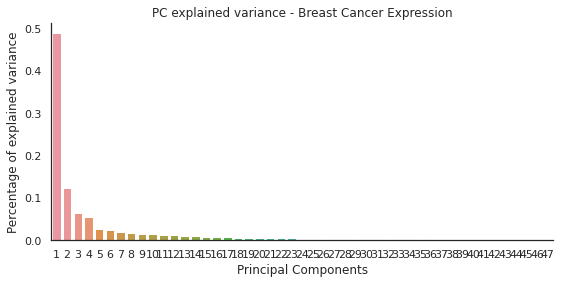

In [89]:
sns.barplot(x=np.arange(1,48), y=pca.explained_variance_ratio_)

plt.title("PC explained variance - Breast Cancer Expression")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")

sns.despine()

In [90]:
reduce_bce = pca.transform(X)
reduce_bce

reduce_bce = pd.DataFrame(reduce_bce)
reduce_bce.head()

0         1         2         3         4         5         6   \
0  9.264688  2.231807  0.964991 -2.131075 -0.098354  1.069809  0.605815   
1  7.794874  0.732082 -1.141297  1.332433  1.271122  0.469944  0.632577   
2  8.005062 -2.458199 -2.821219  2.396689  0.219696 -0.285557  0.371973   
3  8.321142 -1.284390 -1.042043 -1.083681  0.406203  2.204460  0.271024   
4  3.576266 -2.089123 -2.808648  6.931476 -0.344832  0.817378 -1.408007   

         7         8         9   ...        37        38        39        40  \
0 -1.029693  0.544319 -0.256190  ... -0.613299 -0.346789 -0.098423  0.918352   
1  0.010944  1.241624  0.794444  ...  0.112297 -0.178576  0.156716  0.311776   
2  0.374003  0.672532 -0.350341  ...  0.278819  0.096526  0.043821 -0.194599   
3  0.556414  1.756337  0.963701  ...  0.047878 -0.073659  0.274866  0.107674   
4  2.899480 -1.895153 -0.263459  ... -0.075022  0.099727  0.060081 -0.103643   

         41        42        43        44        45        46  
0  0.187434 -0.424231  0.156743 -0.088714 -0.202160 -0.154234  
1  0.244172 -0.332960  0.425786  0.150019  0.444819 -0.158334  
2 -0.241069 -0.097057 -0.176216  0.200189  0.491736  0.039126  
3 -0.535071 -0.246774 -0.015794  0.056308  0.117882 -0.140260  
4  0.188989 -0.066659 -0.593408  0.010863 -0.545634  0.032241  

[5 rows x 47 columns]

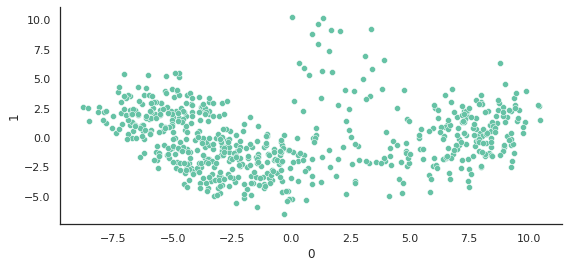

In [73]:
sns.scatterplot(data=reduce_bce, x=0, y=1)
sns.despine()

In [76]:
# We can see in this scatter plot that there may be some clustering occurring between patients and genes
# Next, we can confirm these clusterings with kmeans
    # First, we need to define the number of clusters using the elbow method

In [91]:
X = reduce_bce.iloc[:, 0:48]

In [103]:
inertia_list = []

for k in range(1,11):
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X)
    
    inertia_list += [kmeans.inertia_]

In [104]:
inertia_list

[37234.12854336073,
 22206.075347162587,
 18983.23411452265,
 17246.884017737873,
 15731.092270991303,
 14742.678830190747,
 14292.006750414172,
 13947.739518058968,
 13636.886395568223,
 13233.851940526043]

Text(0, 0.5, 'inertia')

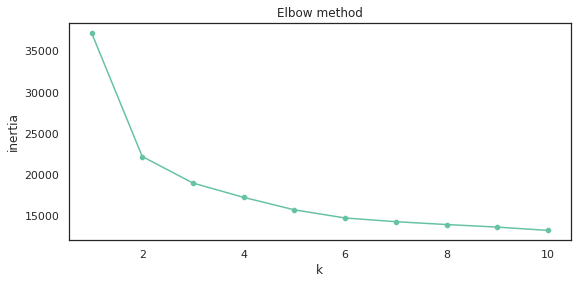

In [105]:
sns.scatterplot(x=np.arange(1,11), y=inertia_list)
sns.lineplot(x=np.arange(1,11), y=inertia_list)
sns.despine

plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("inertia")

In [106]:
# Using the elbow method, we can identify K = 6

In [107]:
k = 6

In [108]:
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

reduce_bce["cluster"] = kmeans.labels_
reduce_bce



0         1         2         3         4         5         6  \
0    9.264688  2.231807  0.964991 -2.131075 -0.098354  1.069809  0.605815   
1    7.794874  0.732082 -1.141297  1.332433  1.271122  0.469944  0.632577   
2    8.005062 -2.458199 -2.821219  2.396689  0.219696 -0.285557  0.371973   
3    8.321142 -1.284390 -1.042043 -1.083681  0.406203  2.204460  0.271024   
4    3.576266 -2.089123 -2.808648  6.931476 -0.344832  0.817378 -1.408007   
..        ...       ...       ...       ...       ...       ...       ...   
640  1.133602  7.964754  1.929736 -1.109872  0.686706 -1.740159  0.140004   
641  3.170828  3.248832  1.500530 -2.643236 -0.104649 -0.186207  0.489494   
642  1.586072  7.394928  2.972734 -0.559862  0.858476  0.258948 -0.693968   
643  1.245953  3.402544  4.942678  0.988805 -0.494954  0.737549 -0.327824   
644  1.979551  2.740657  0.143423 -1.896762  0.696785  0.241539 -0.205922   

            7         8         9  ...        38        39        40  \
0   -1.029693  0.544319 -0.256190  ... -0.346789 -0.098423  0.918352   
1    0.010944  1.241624  0.794444  ... -0.178576  0.156716  0.311776   
2    0.374003  0.672532 -0.350341  ...  0.096526  0.043821 -0.194599   
3    0.556414  1.756337  0.963701  ... -0.073659  0.274866  0.107674   
4    2.899480 -1.895153 -0.263459  ...  0.099727  0.060081 -0.103643   
..        ...       ...       ...  ...       ...       ...       ...   
640  0.273140  1.161577 -1.165051  ... -0.035141  0.067141 -0.059744   
641 -0.155189  0.220720 -2.072617  ... -0.339486  0.761996 -0.060017   
642  0.115288  0.101900  0.336974  ...  0.158151  0.150882 -0.169768   
643  0.902547  0.177132 -1.832936  ... -0.229889  0.500201 -0.023648   
644 -0.244748 -0.201634 -1.196274  ...  0.689894  0.088222  0.204248   

           41        42        43        44        45        46  cluster  
0    0.187434 -0.424231  0.156743 -0.088714 -0.202160 -0.154234        0  
1    0.244172 -0.332960  0.425786  0.150019  0.444819 -0.158334        0  
2   -0.241069 -0.097057 -0.176216  0.200189  0.491736  0.039126        4  
3   -0.535071 -0.246774 -0.015794  0.056308  0.117882 -0.140260        0  
4    0.188989 -0.066659 -0.593408  0.010863 -0.545634  0.032241        4  
..        ...       ...       ...       ...       ...       ...      ...  
640 -0.130458  0.089120 -0.047592 -0.097969 -0.108243  0.046450        5  
641  0.062107 -0.054606 -0.065017 -0.174109  0.156648 -0.196188        5  
642 -0.117347 -0.126480 -0.024956  0.077154  0.008530  0.059293        5  
643  0.241192  0.192034  0.033169 -0.055623  0.028116 -0.193674        5  
644  0.391763 -0.000452  0.349662  0.438910 -0.046662 -0.038742        5  

[645 rows x 48 columns]

/u/taareap/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


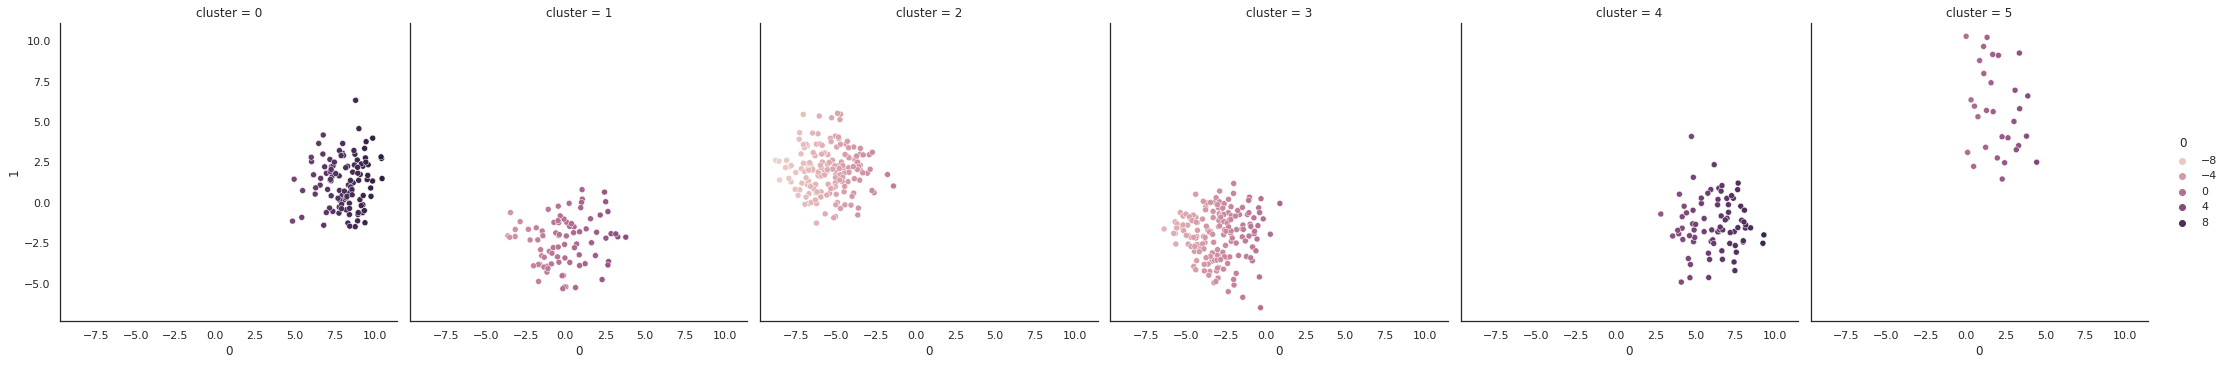

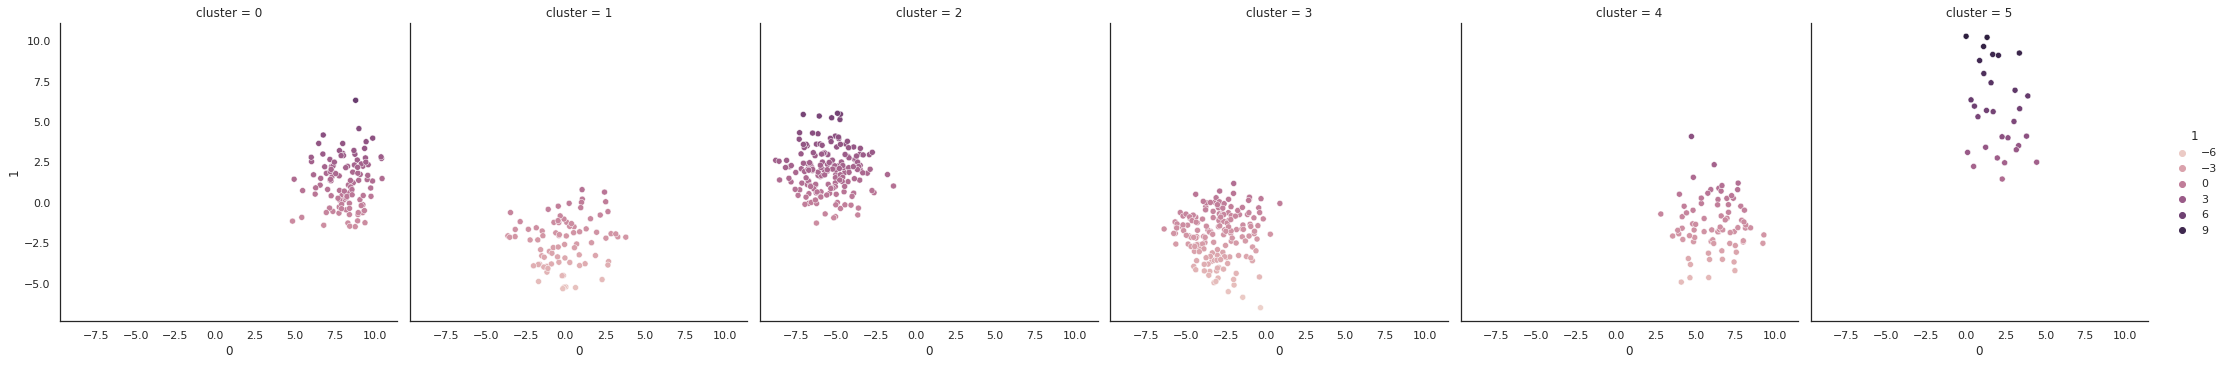

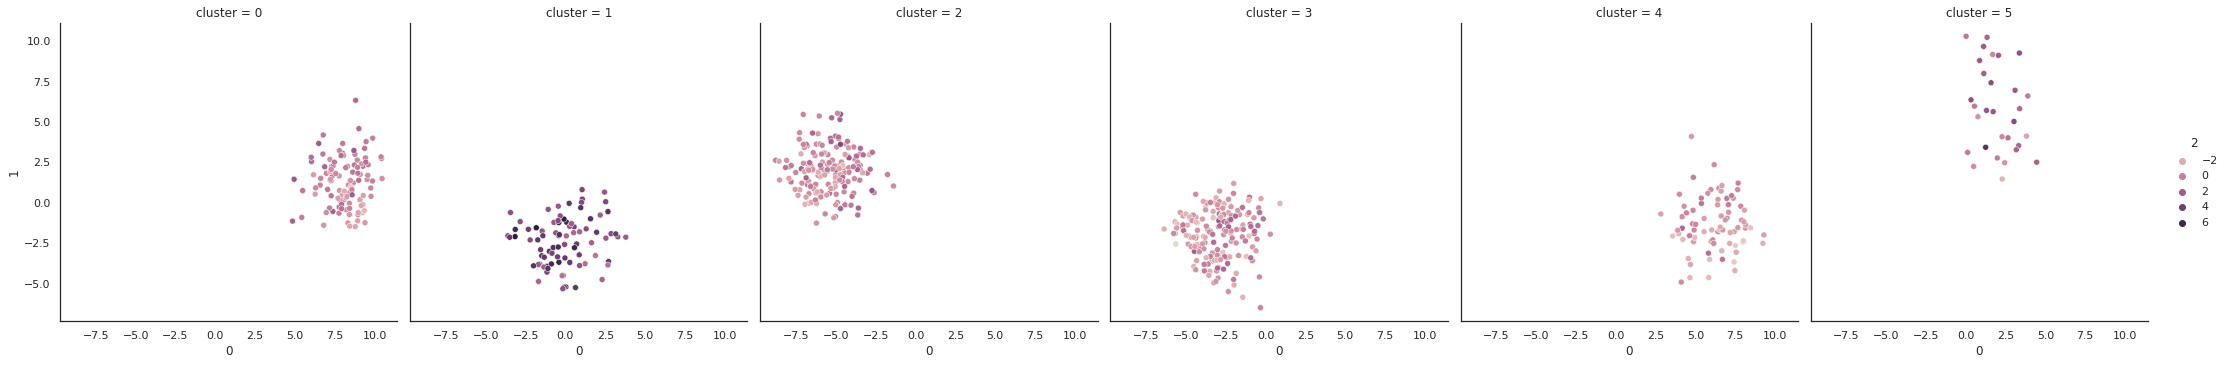

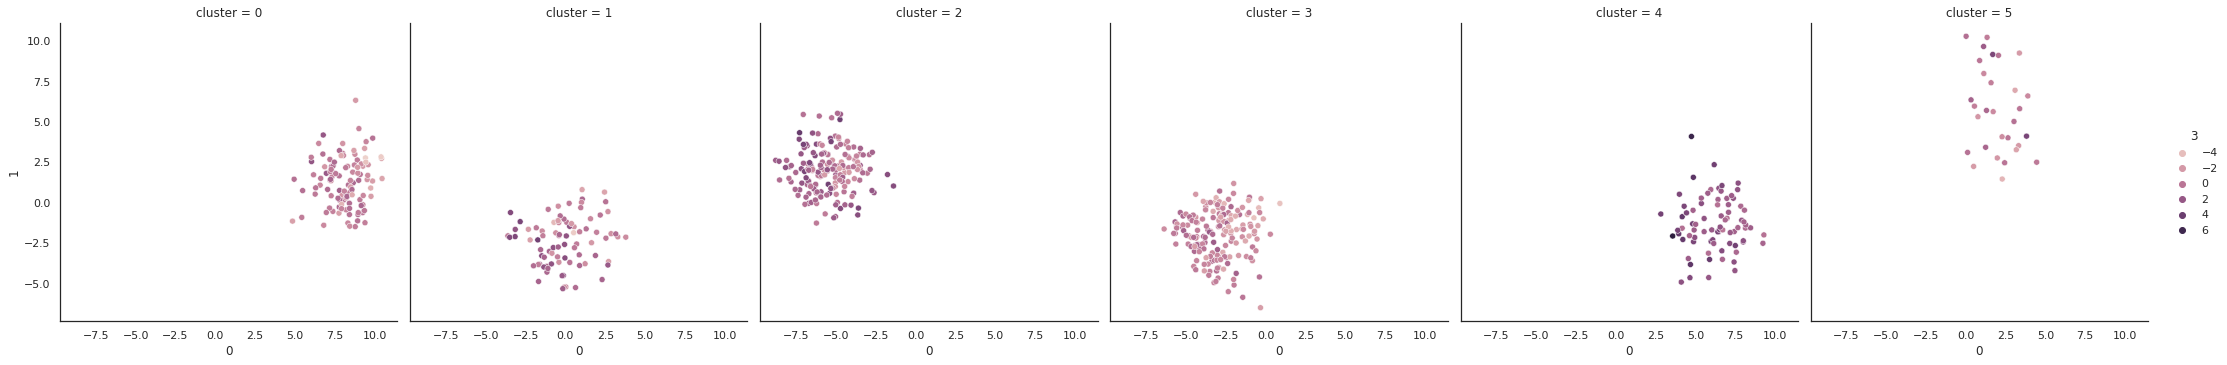

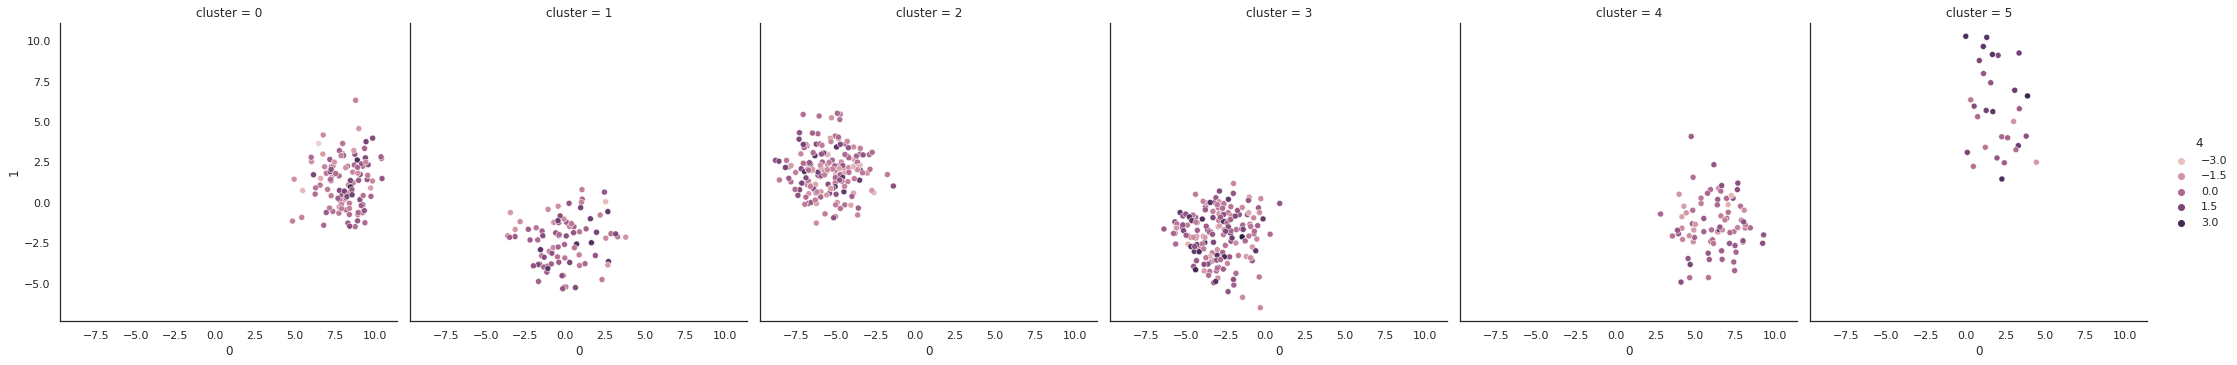

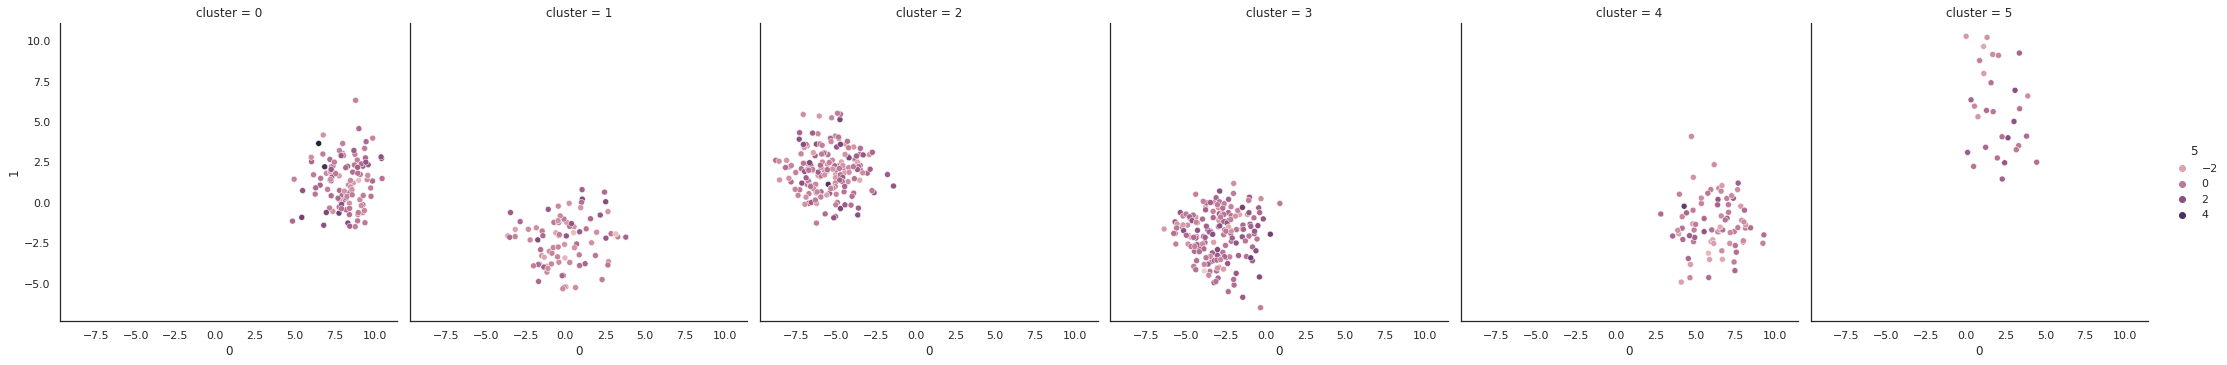

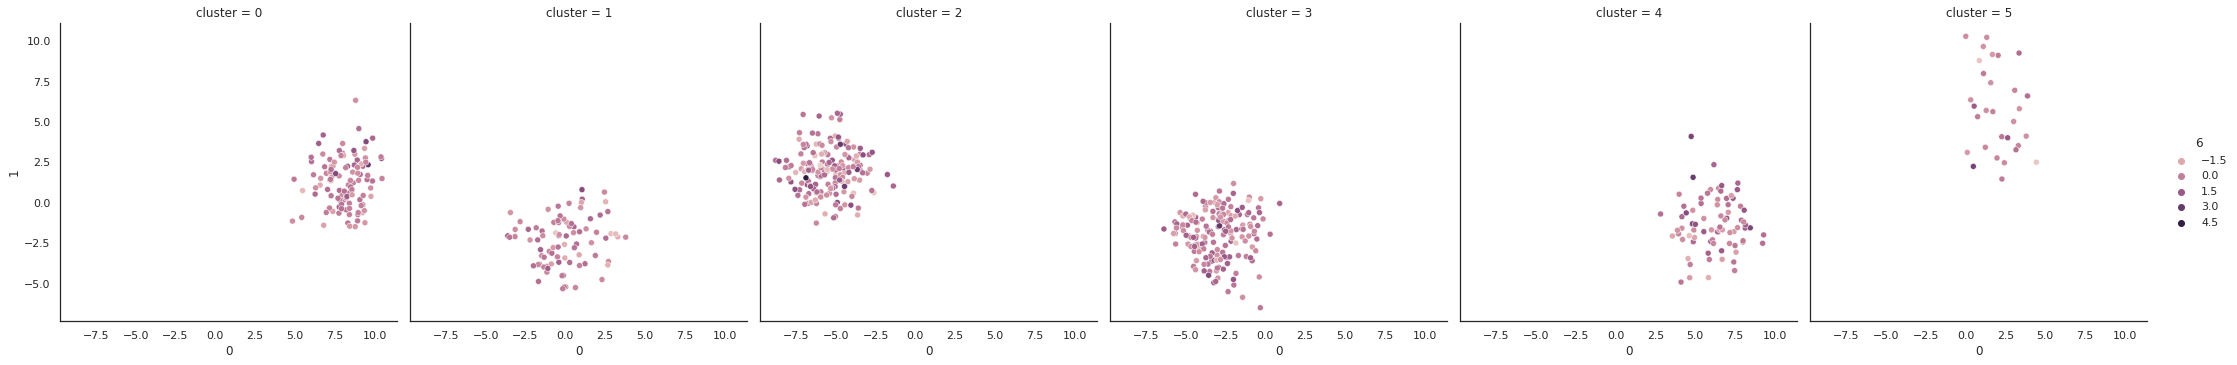

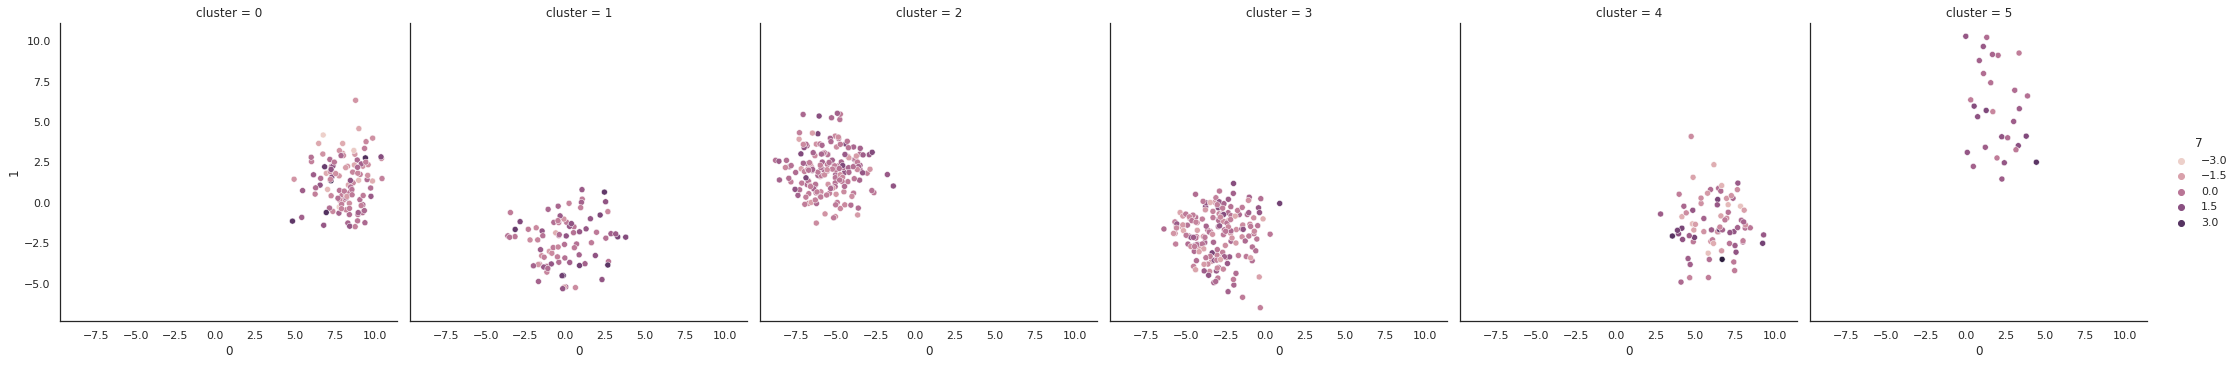

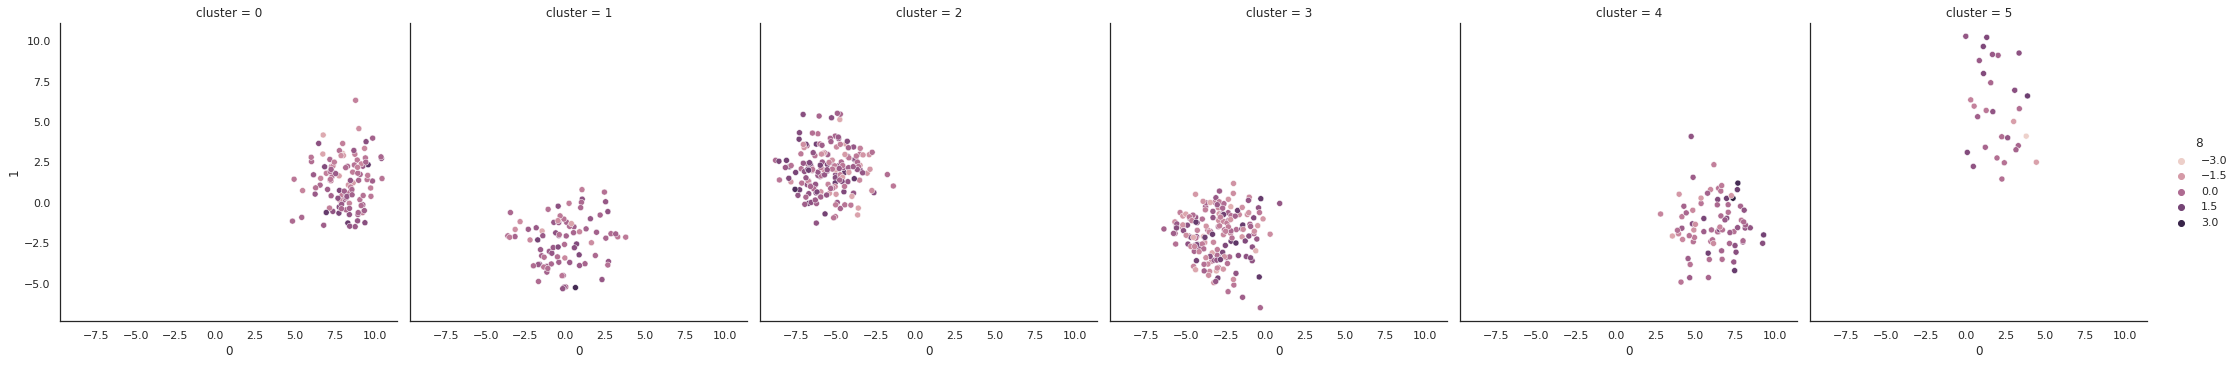

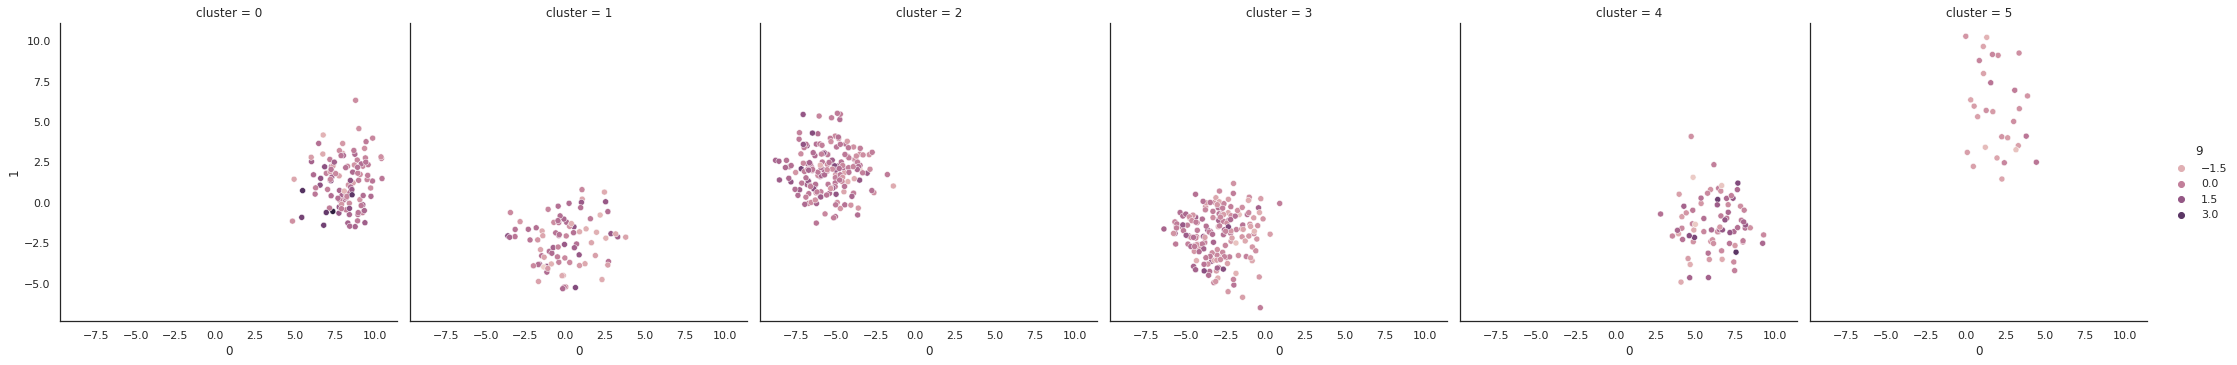

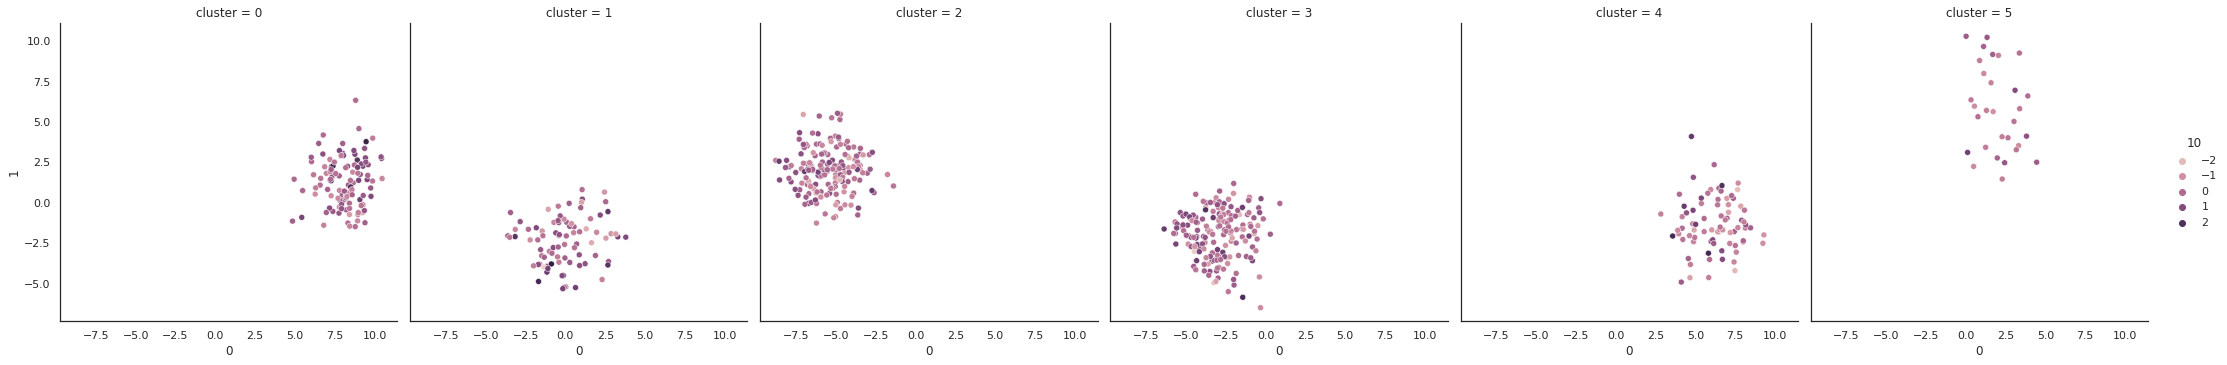

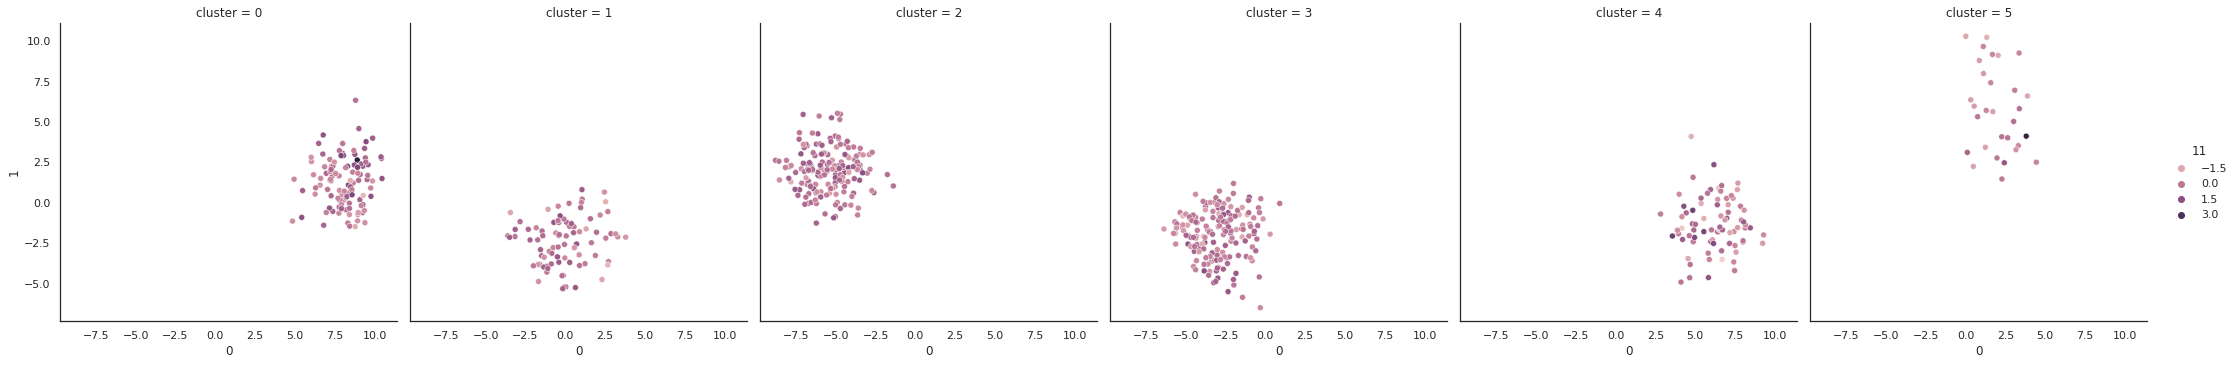

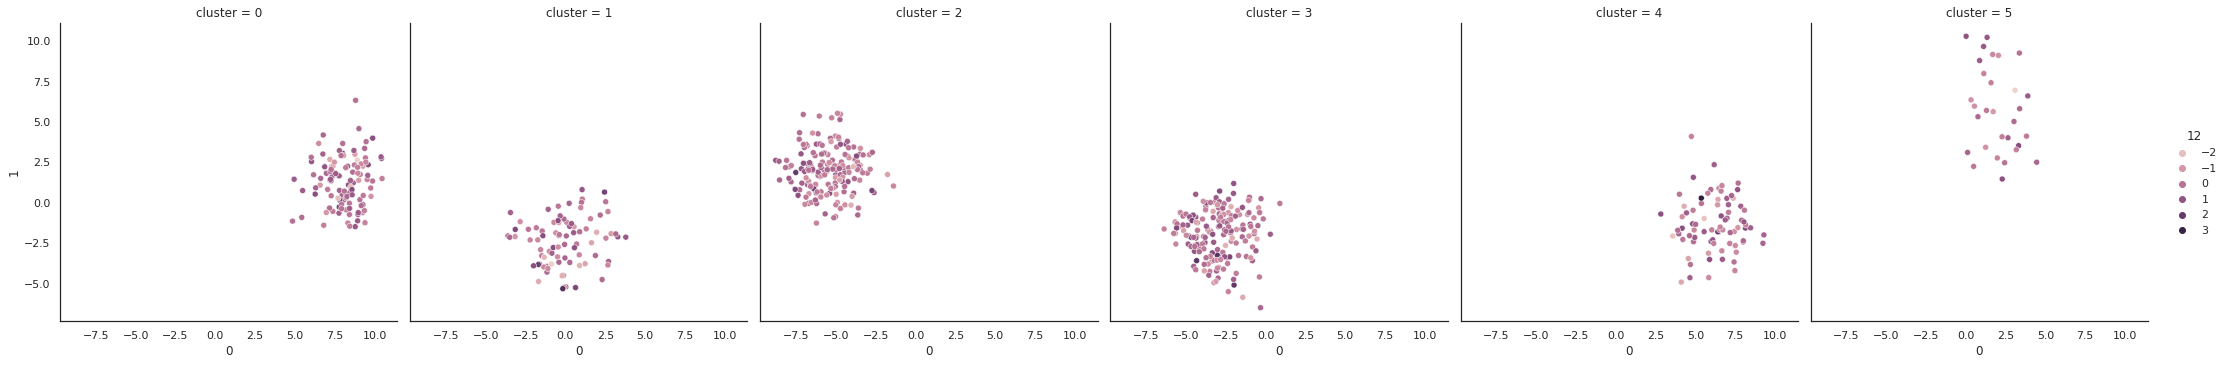

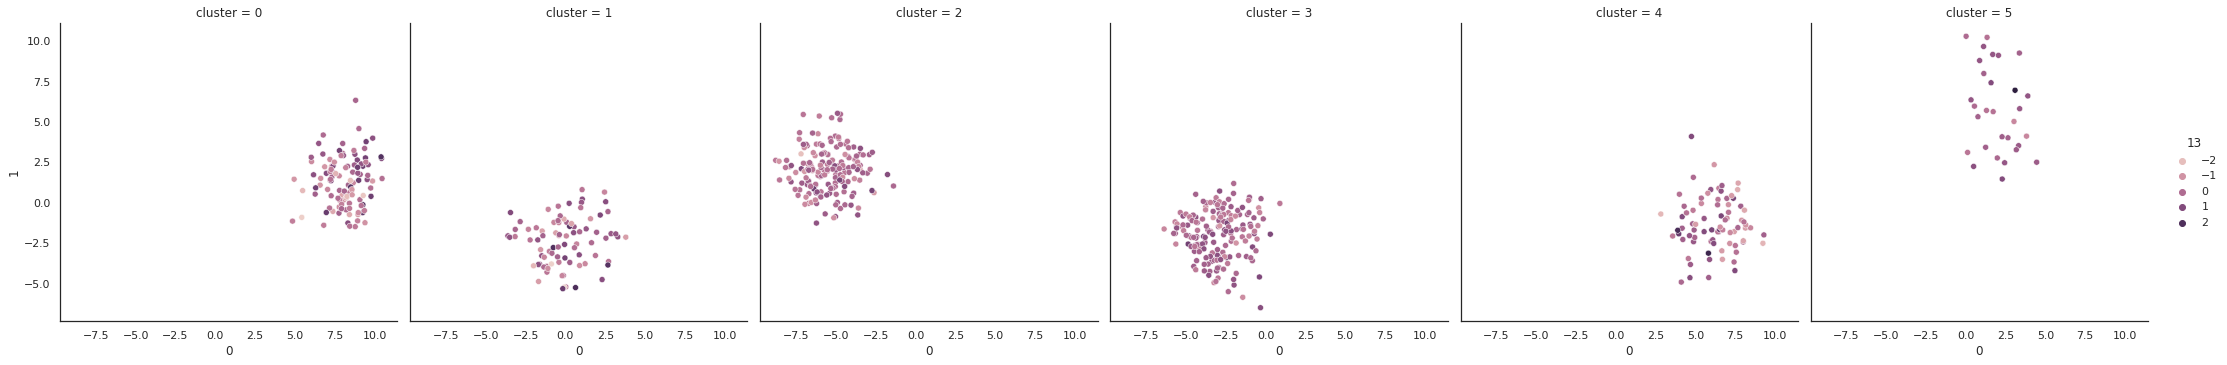

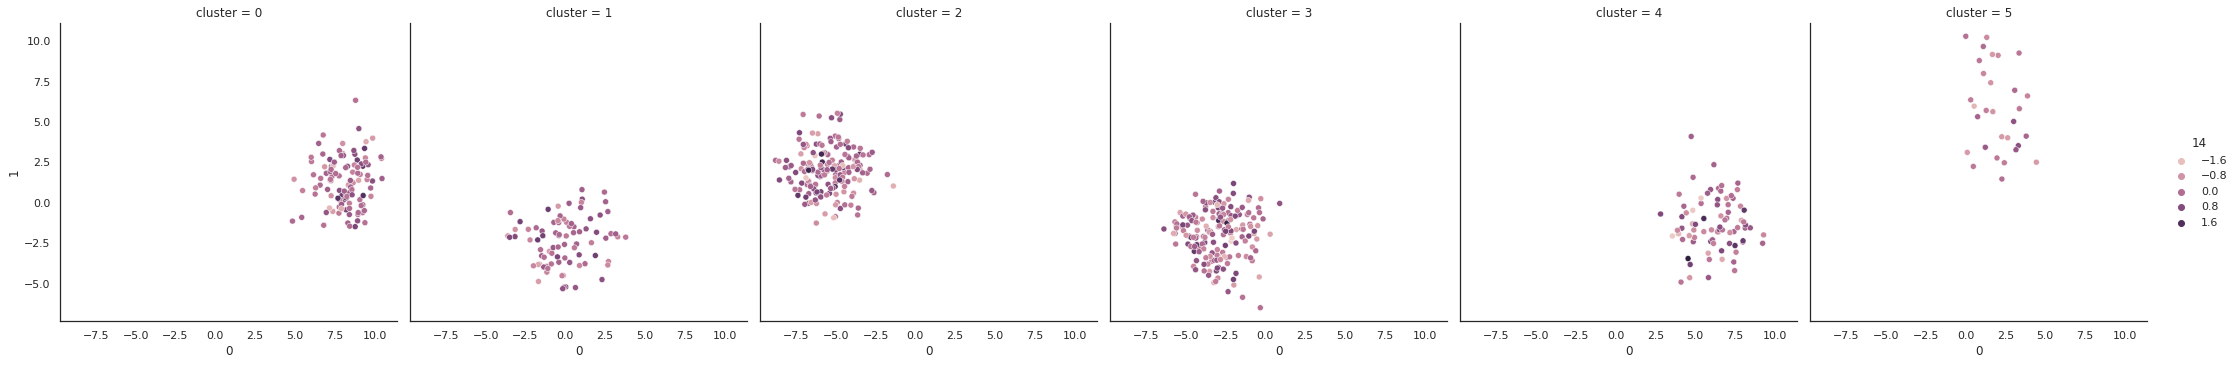

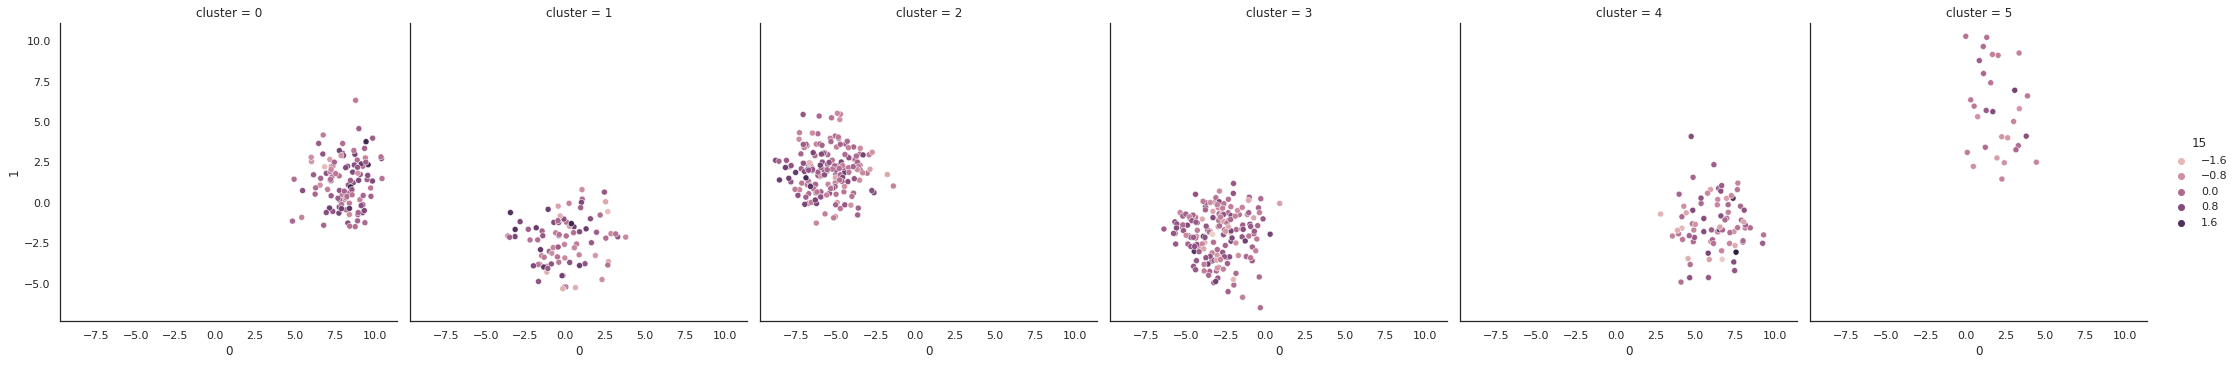

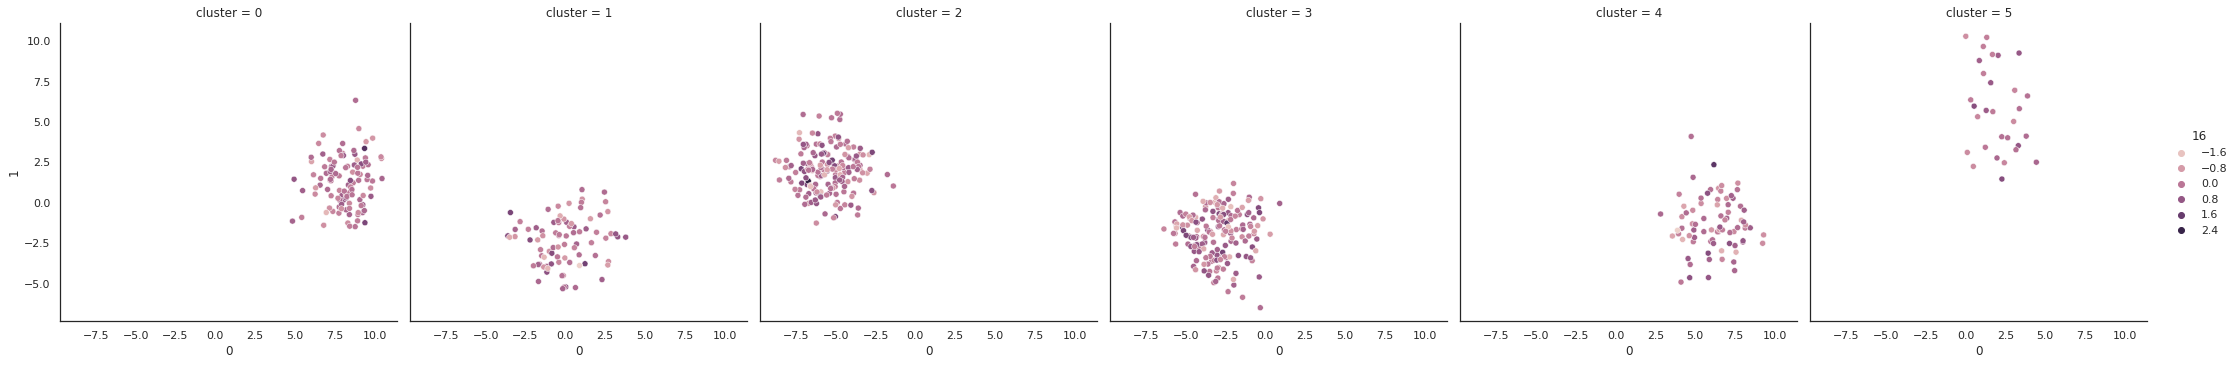

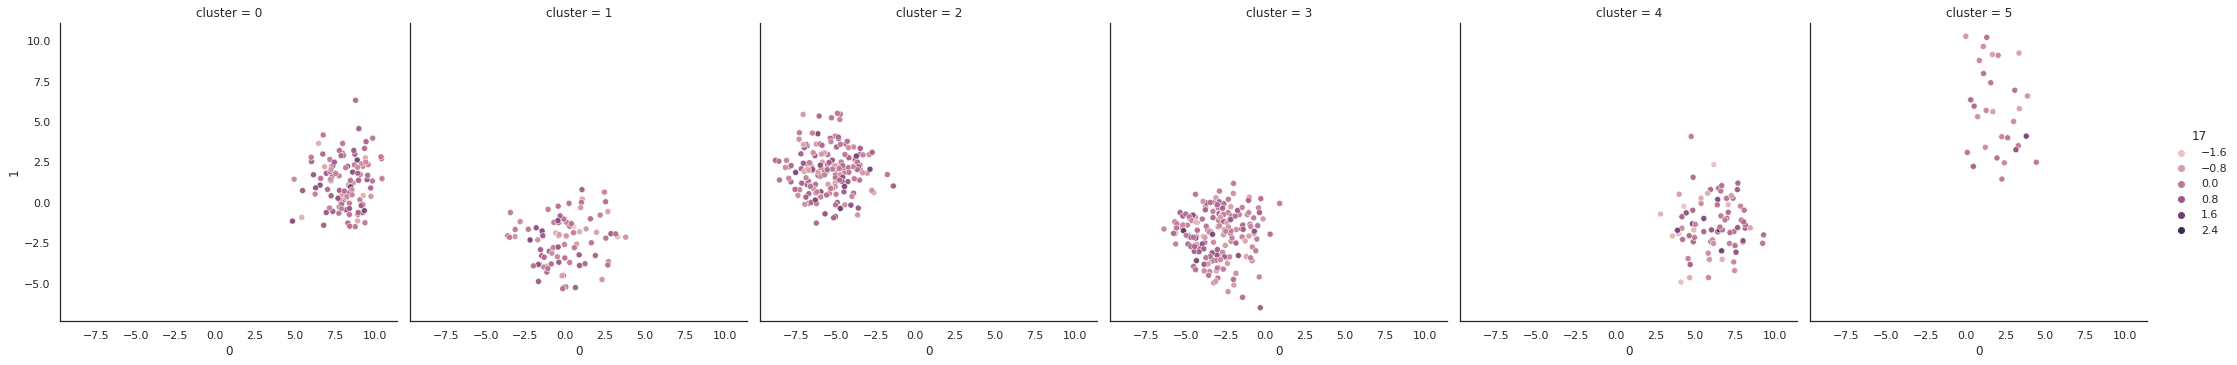

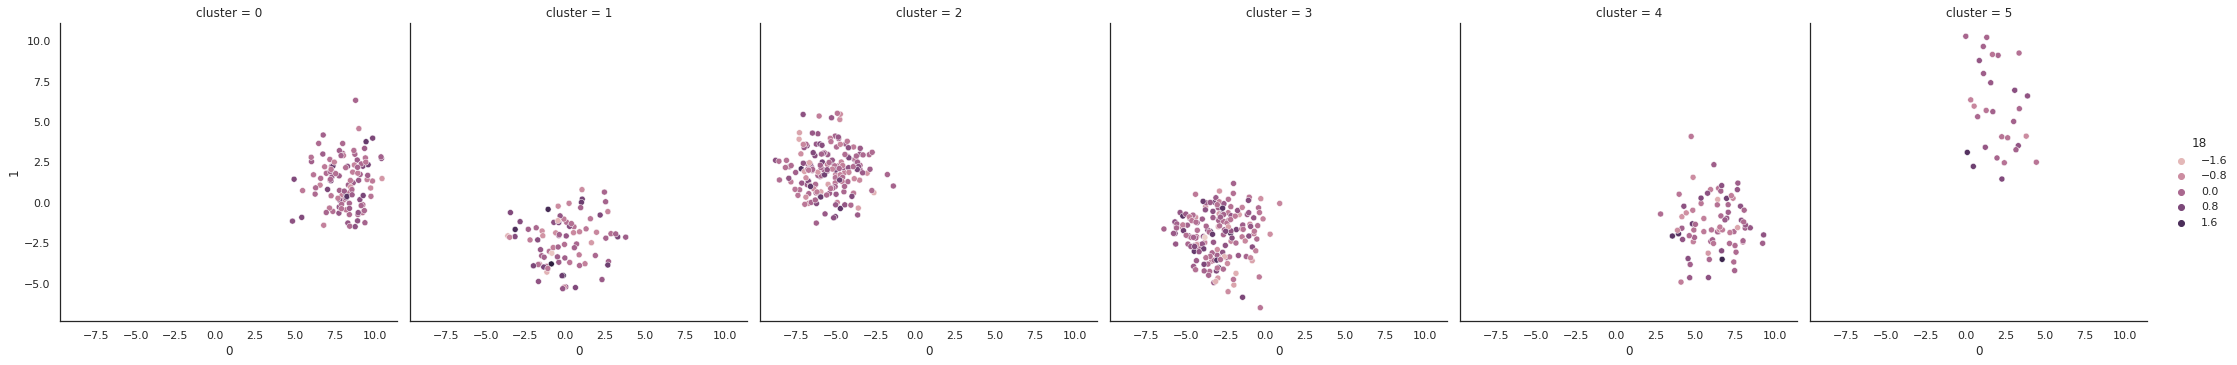

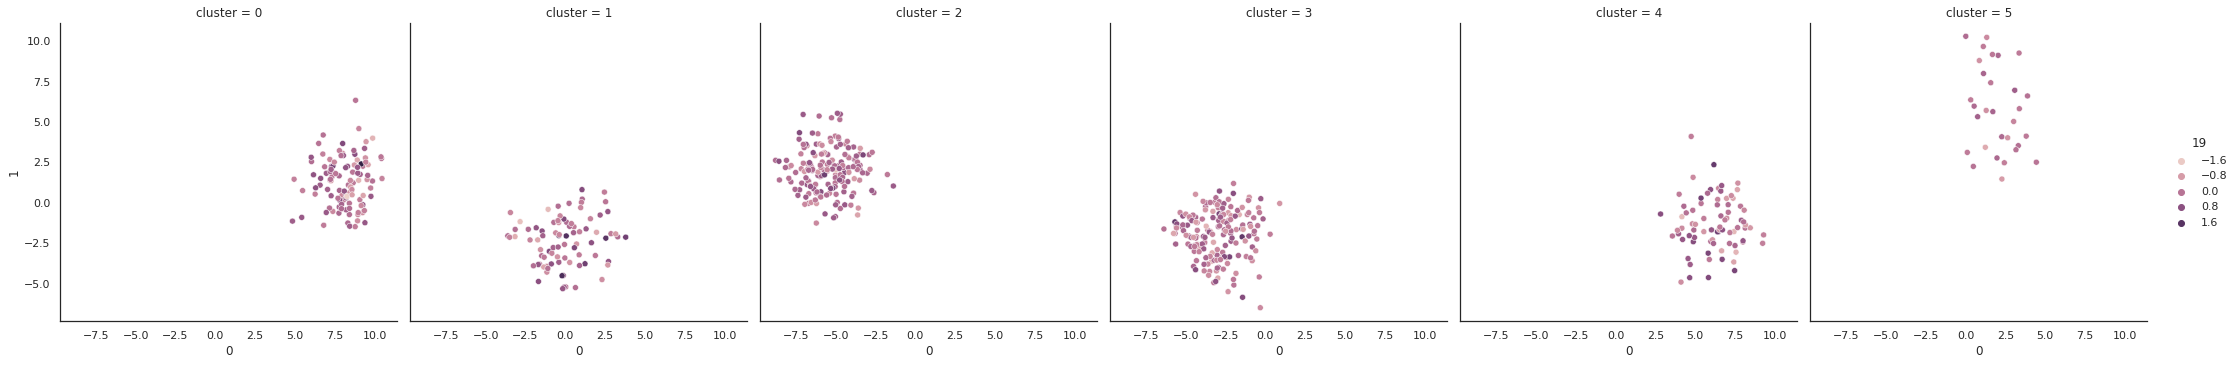

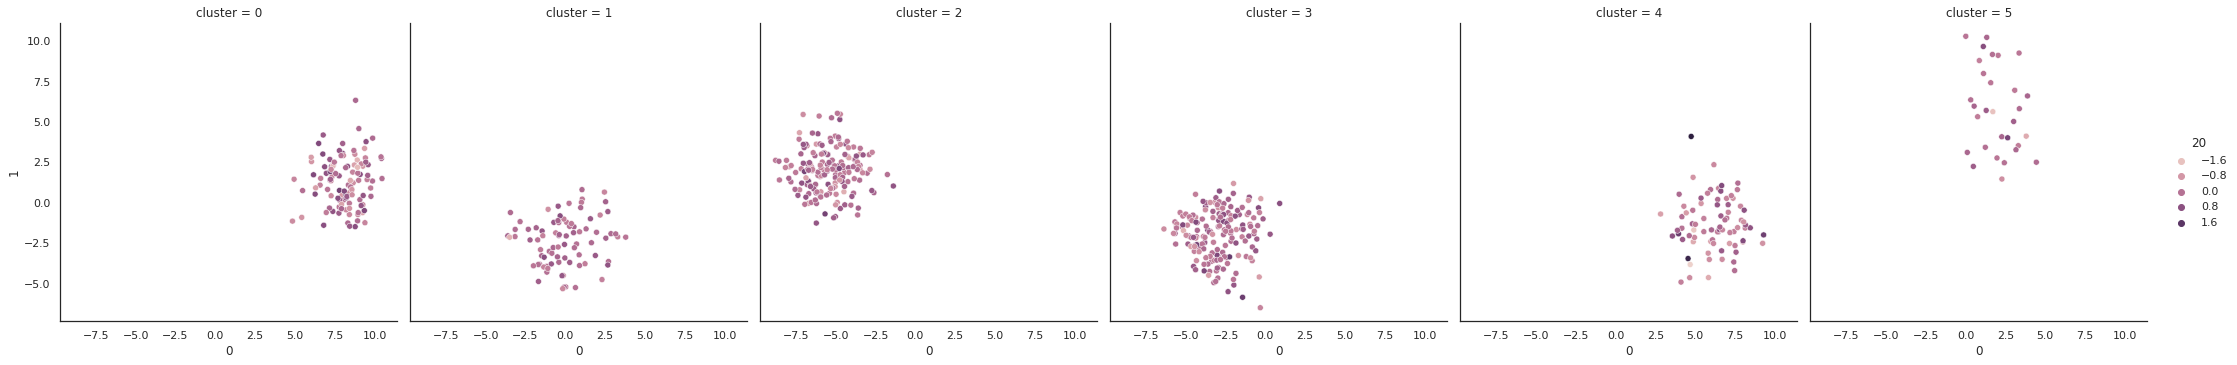

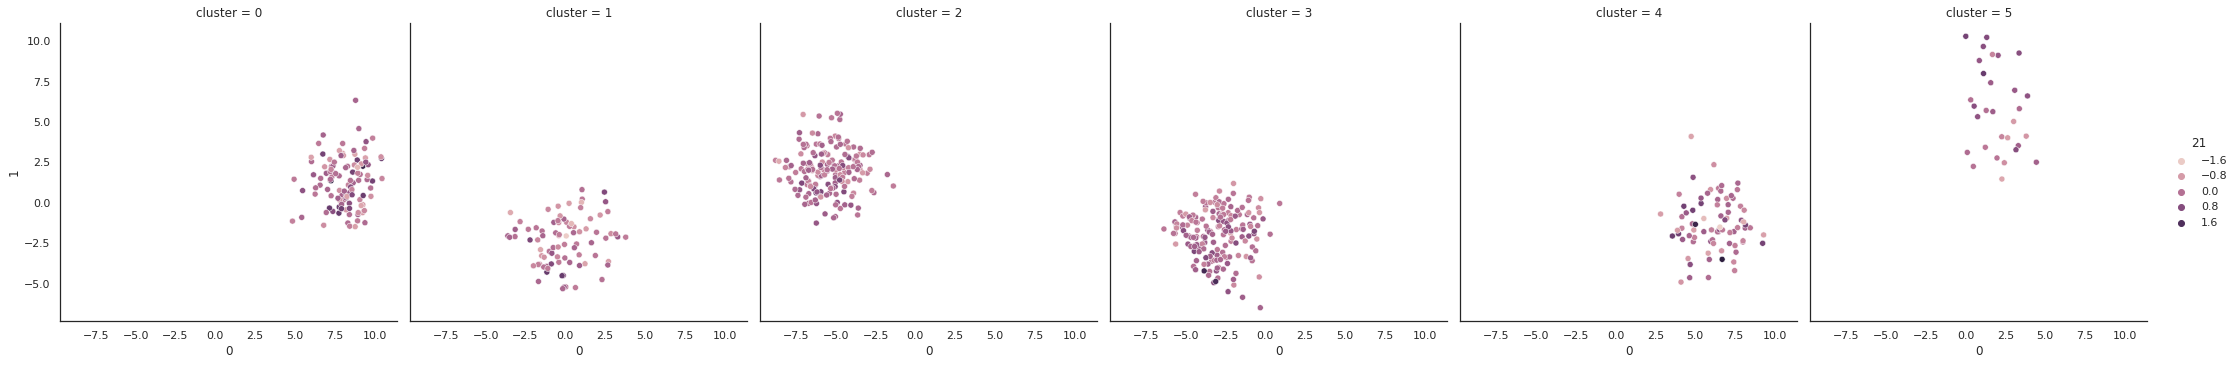

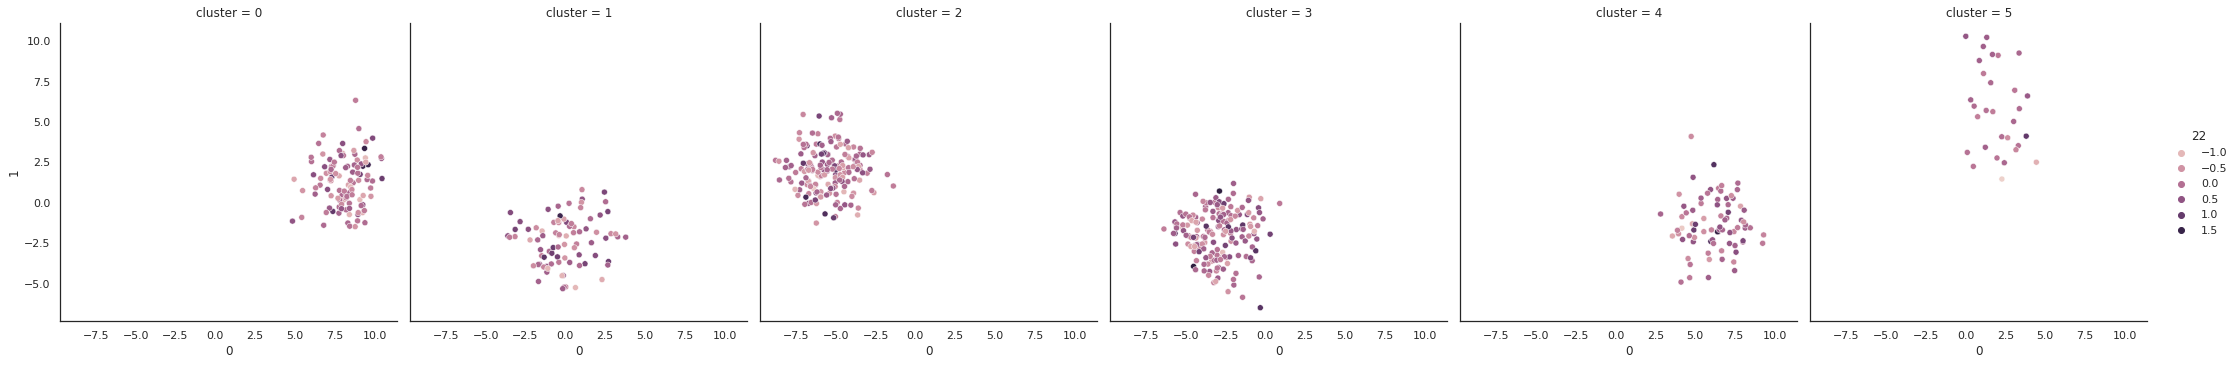

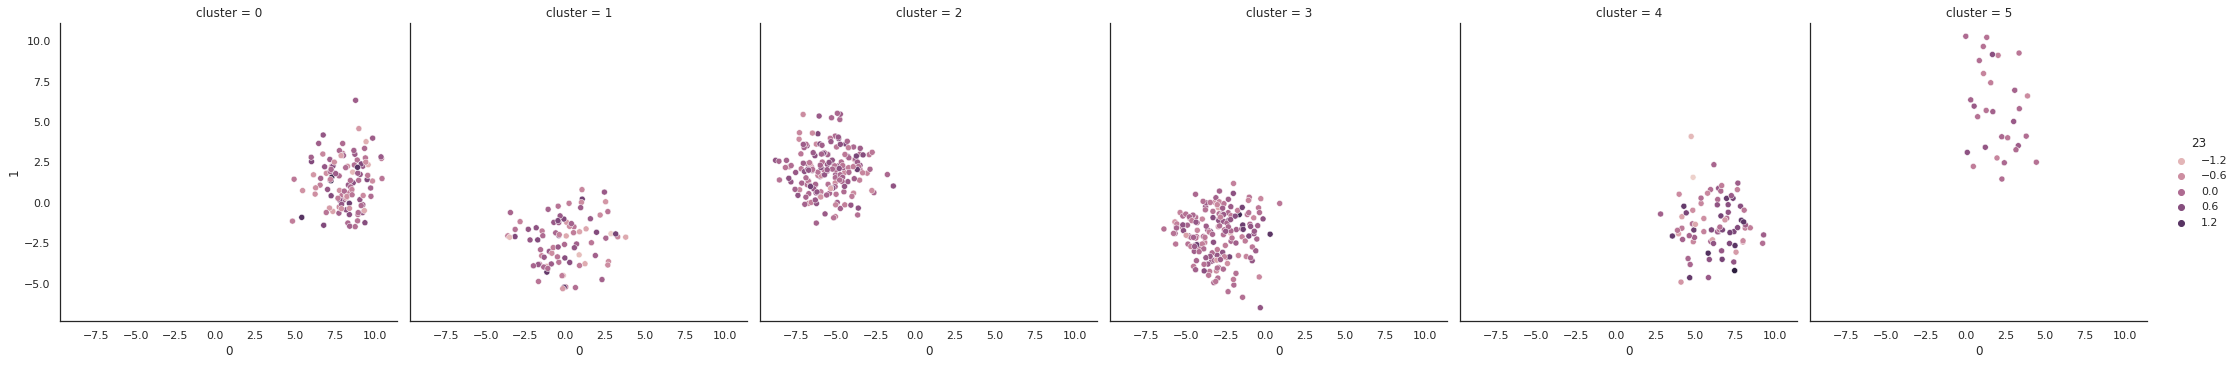

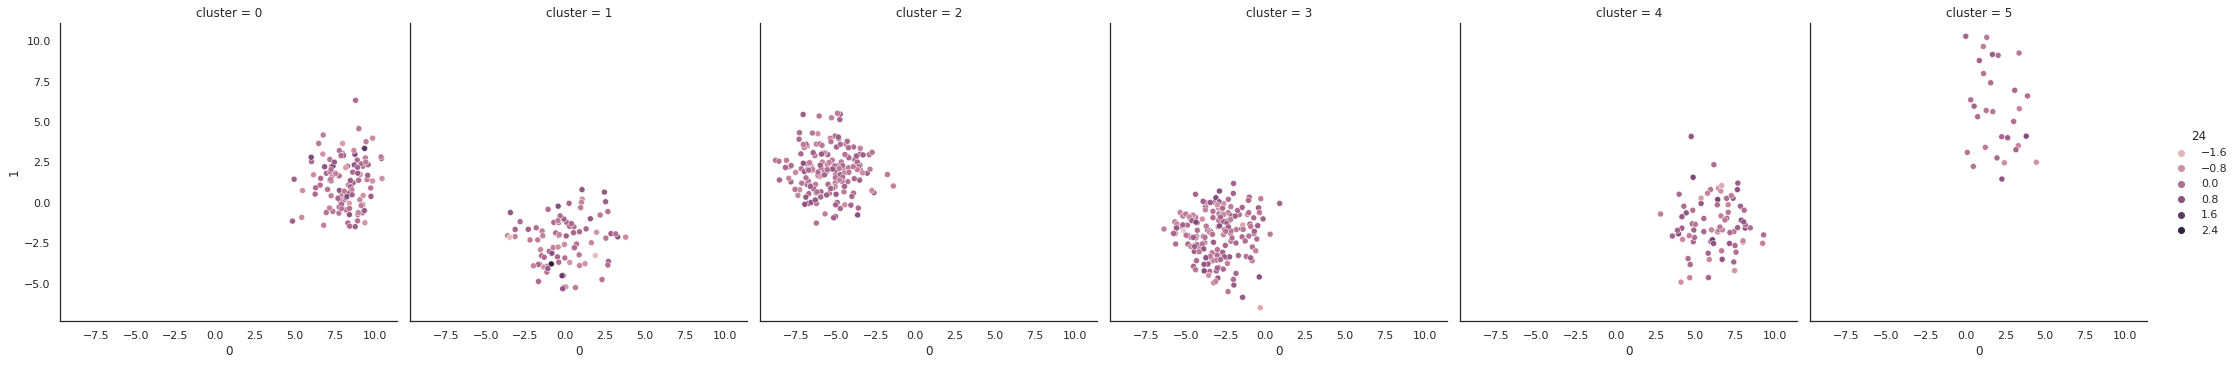

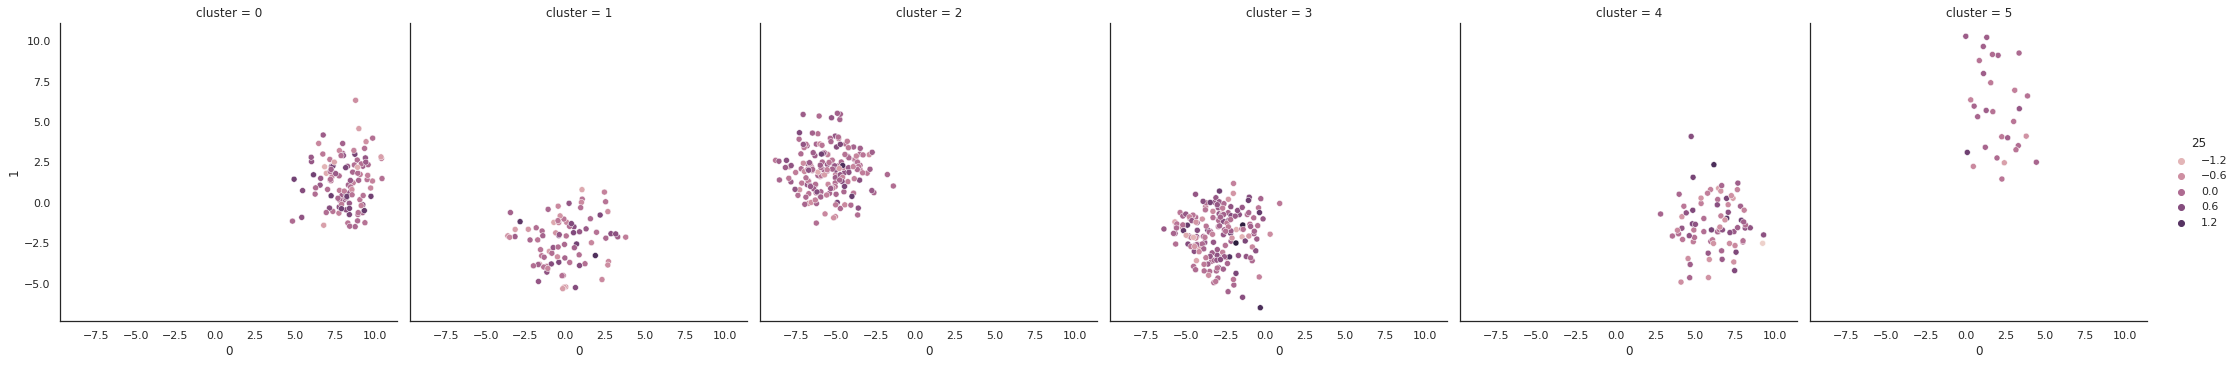

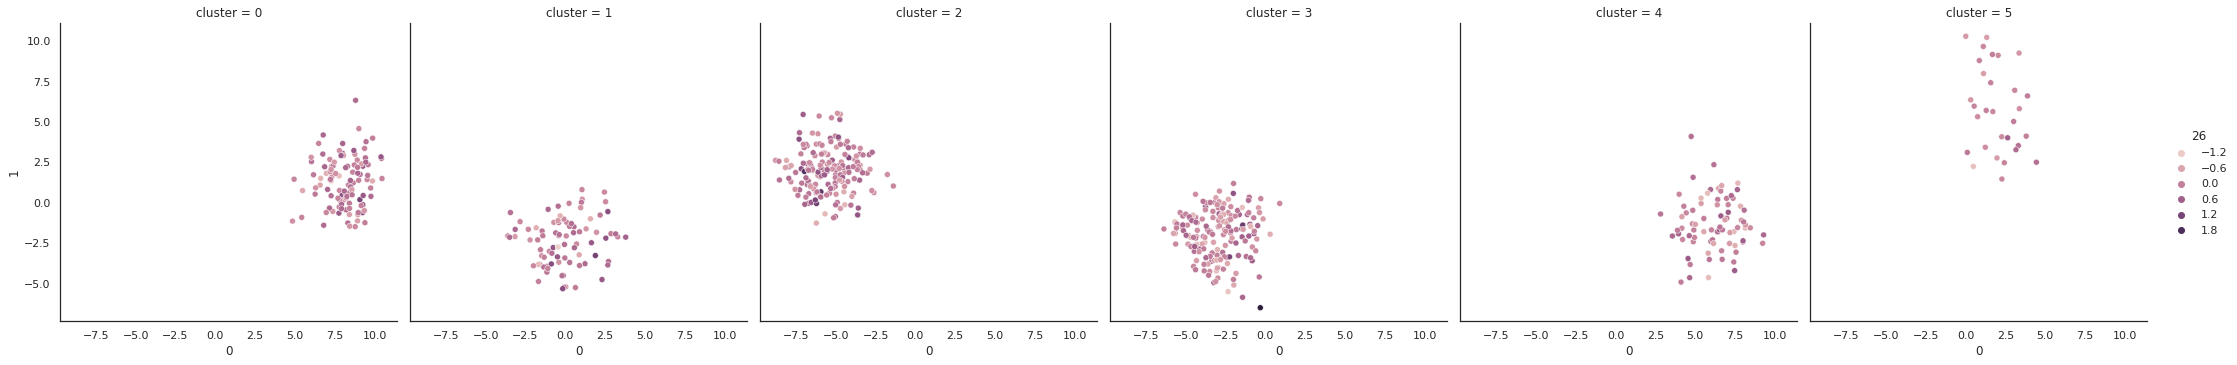

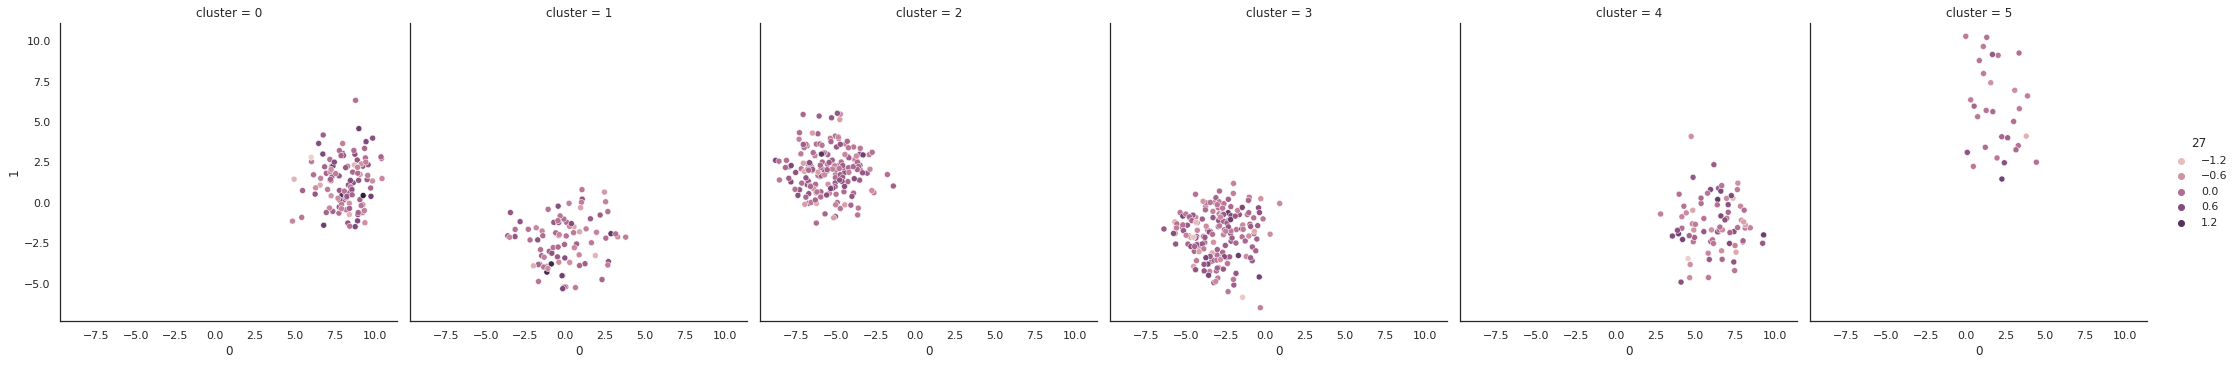

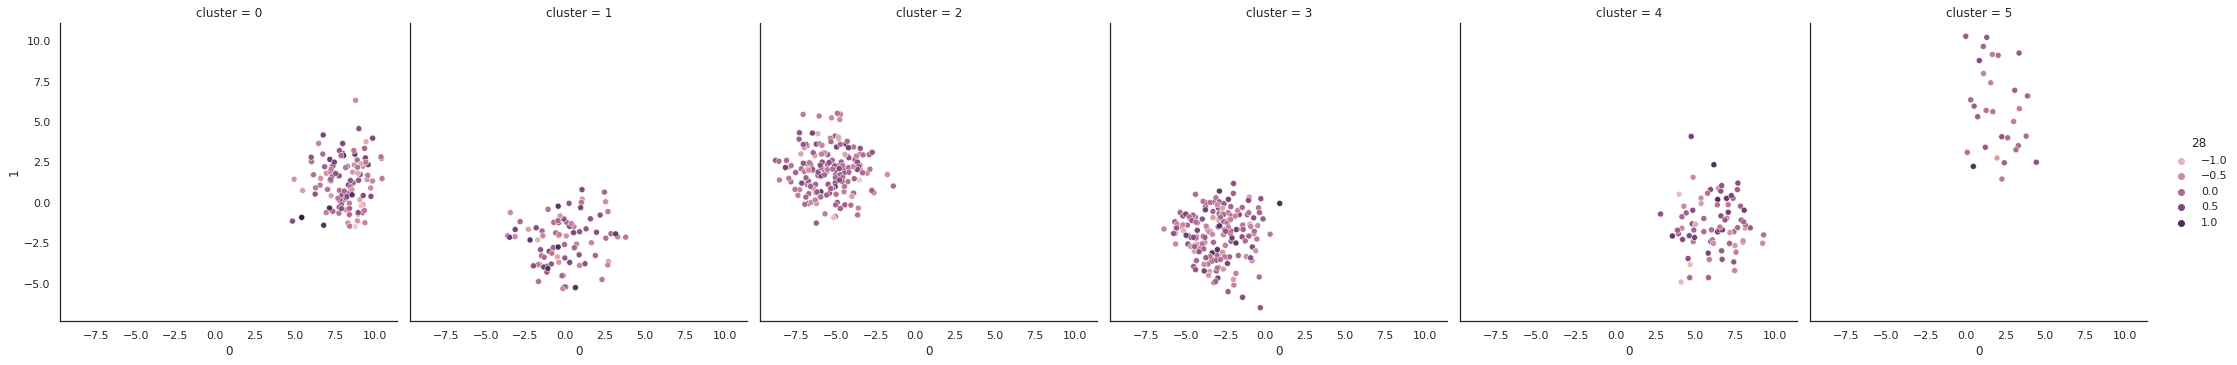

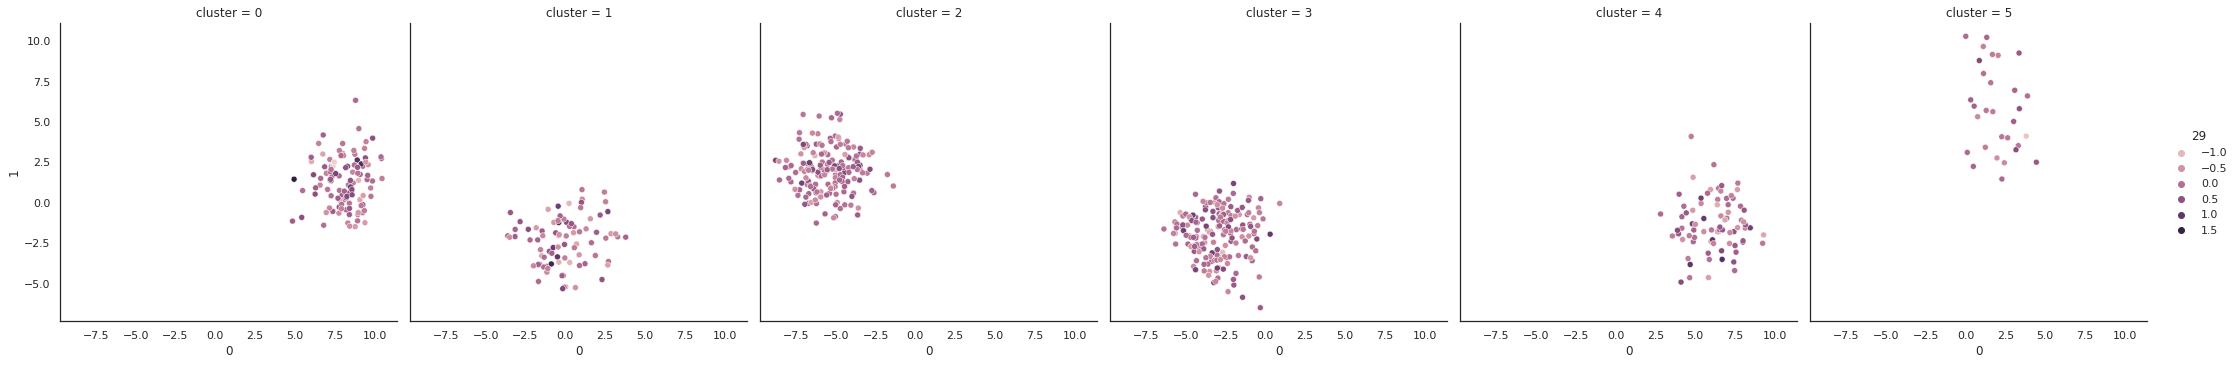

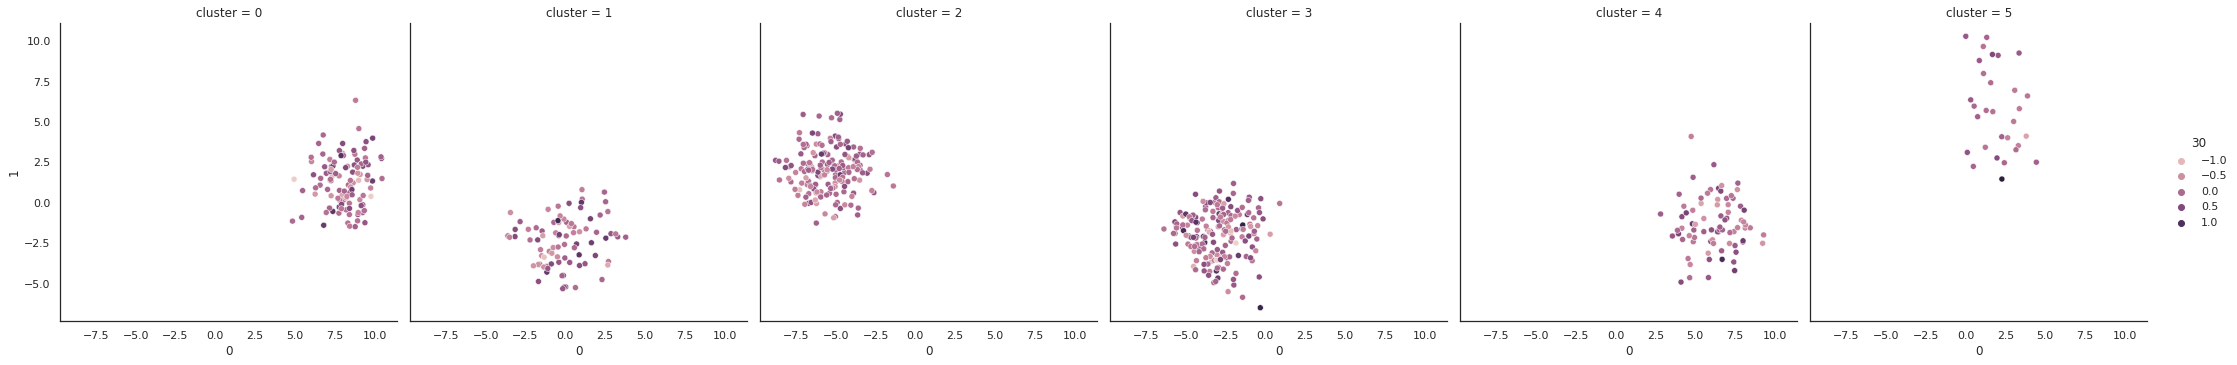

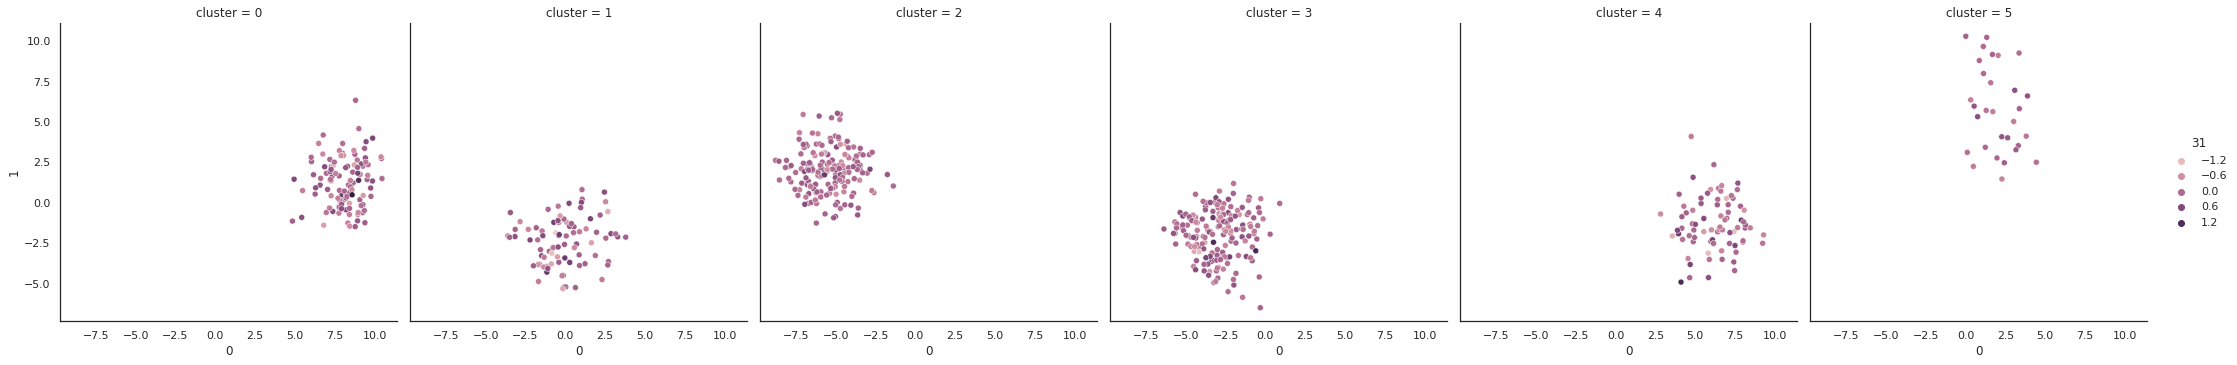

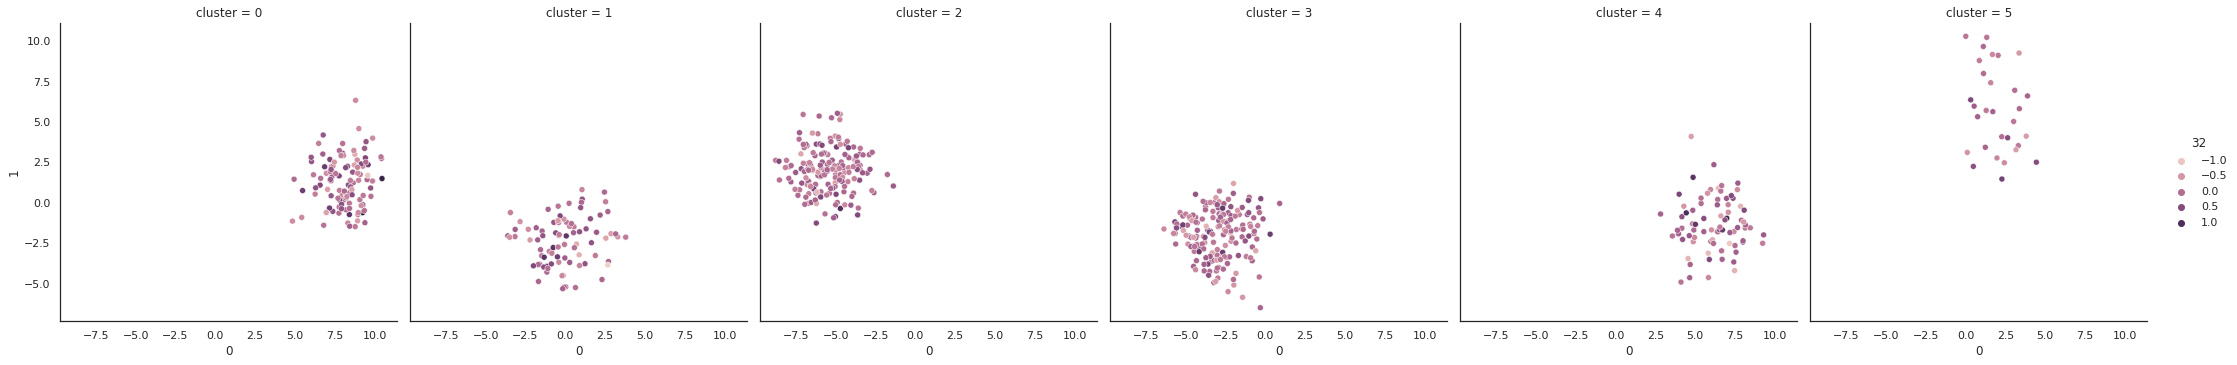

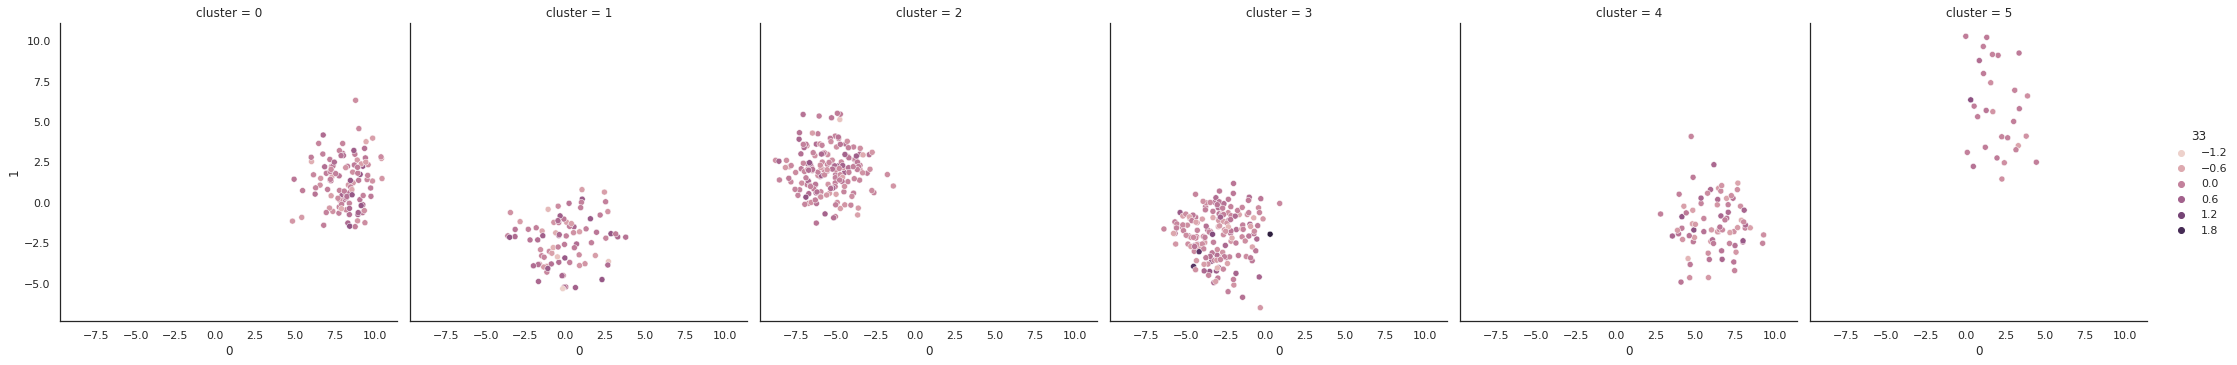

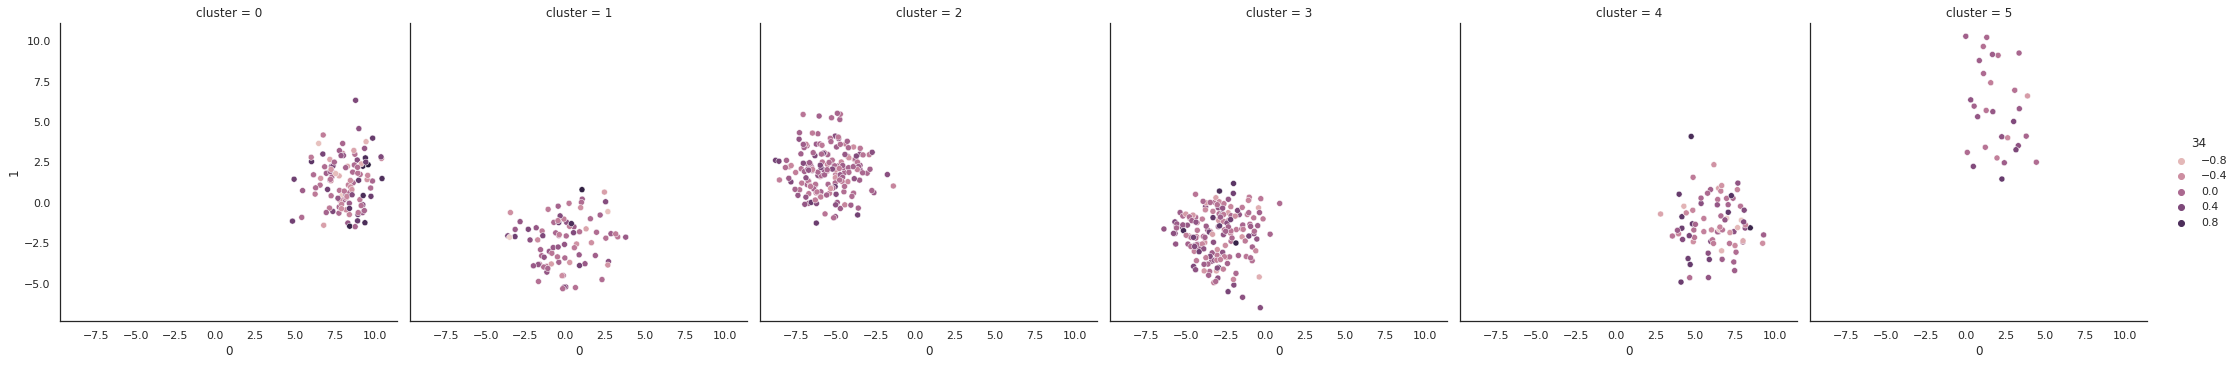

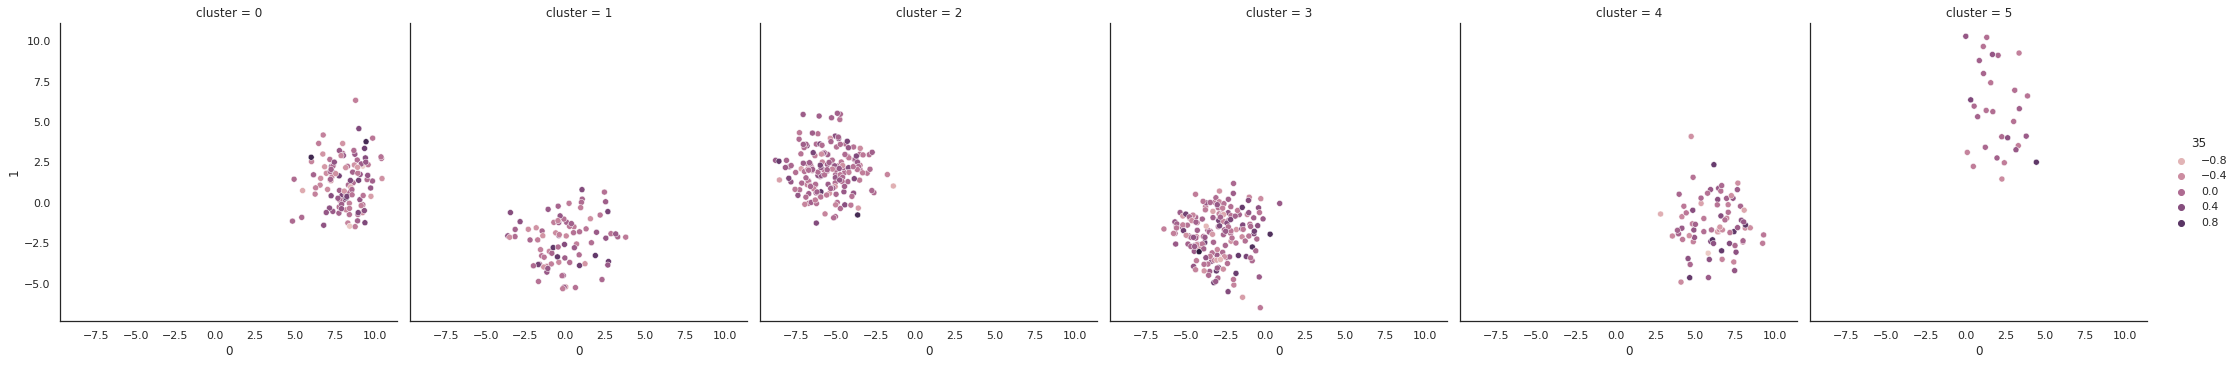

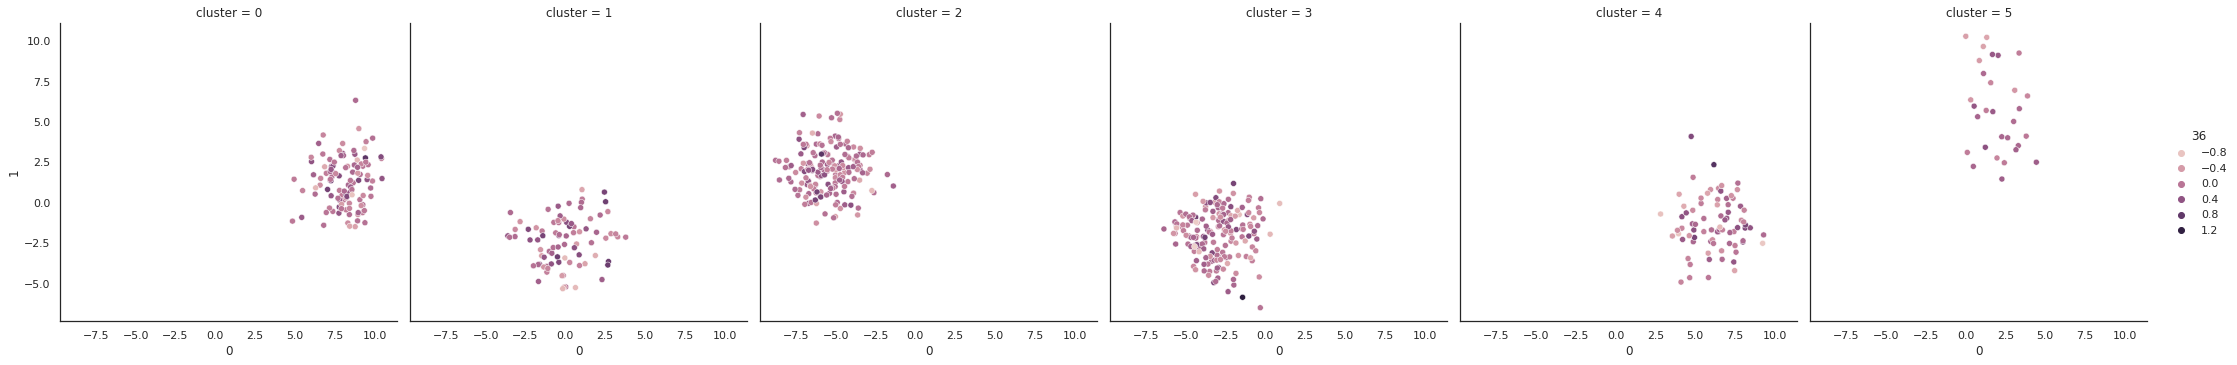

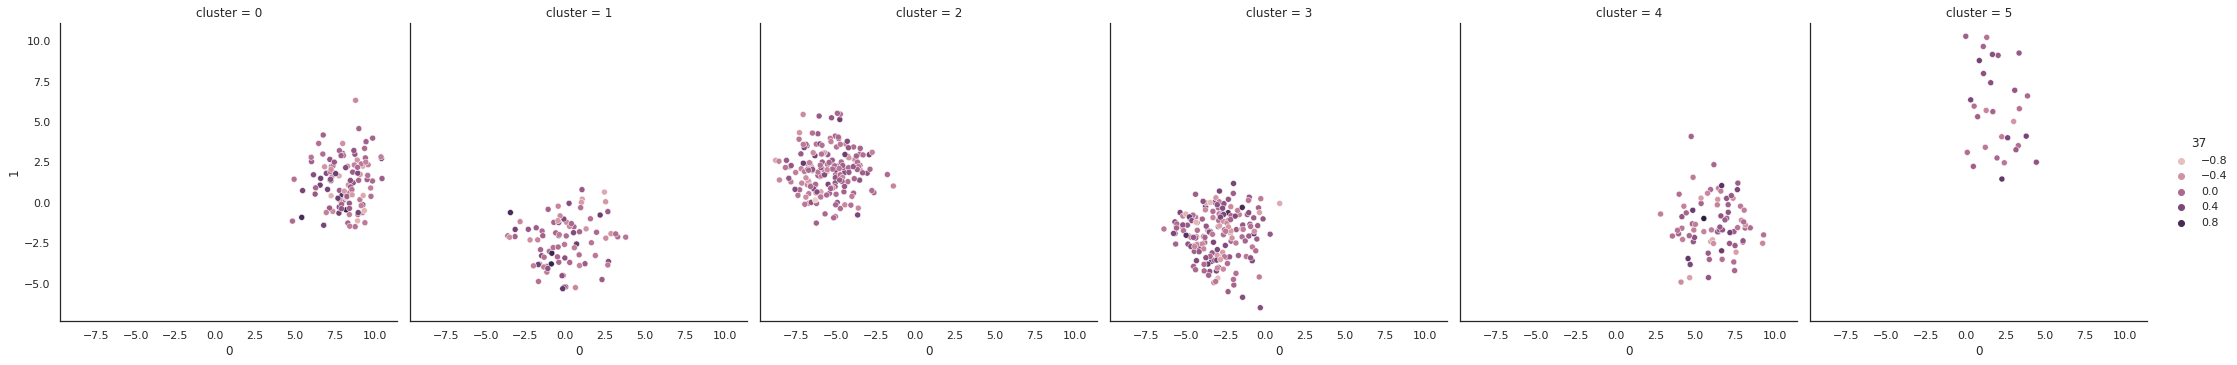

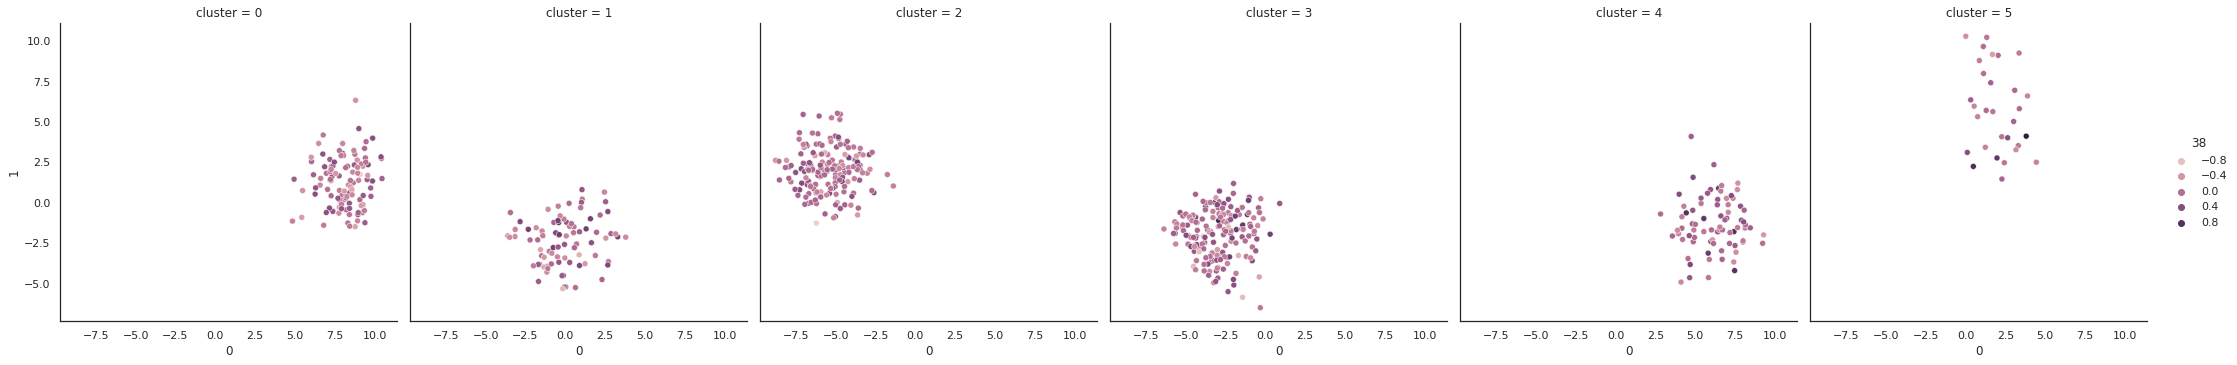

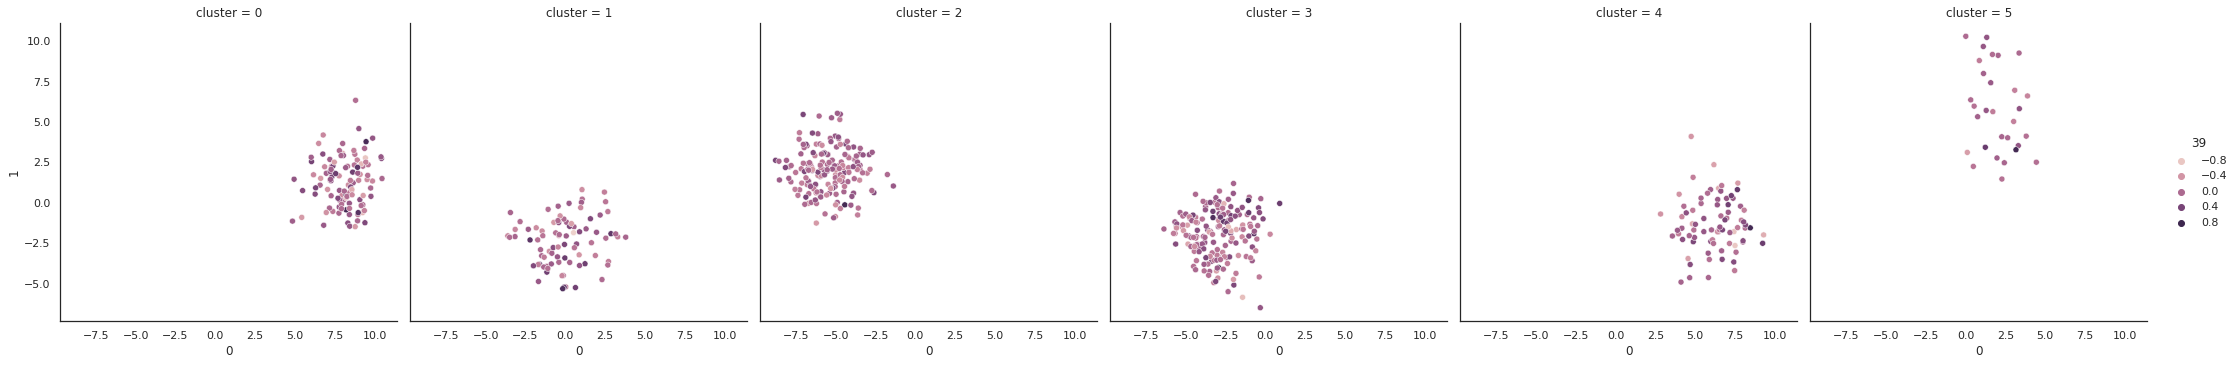

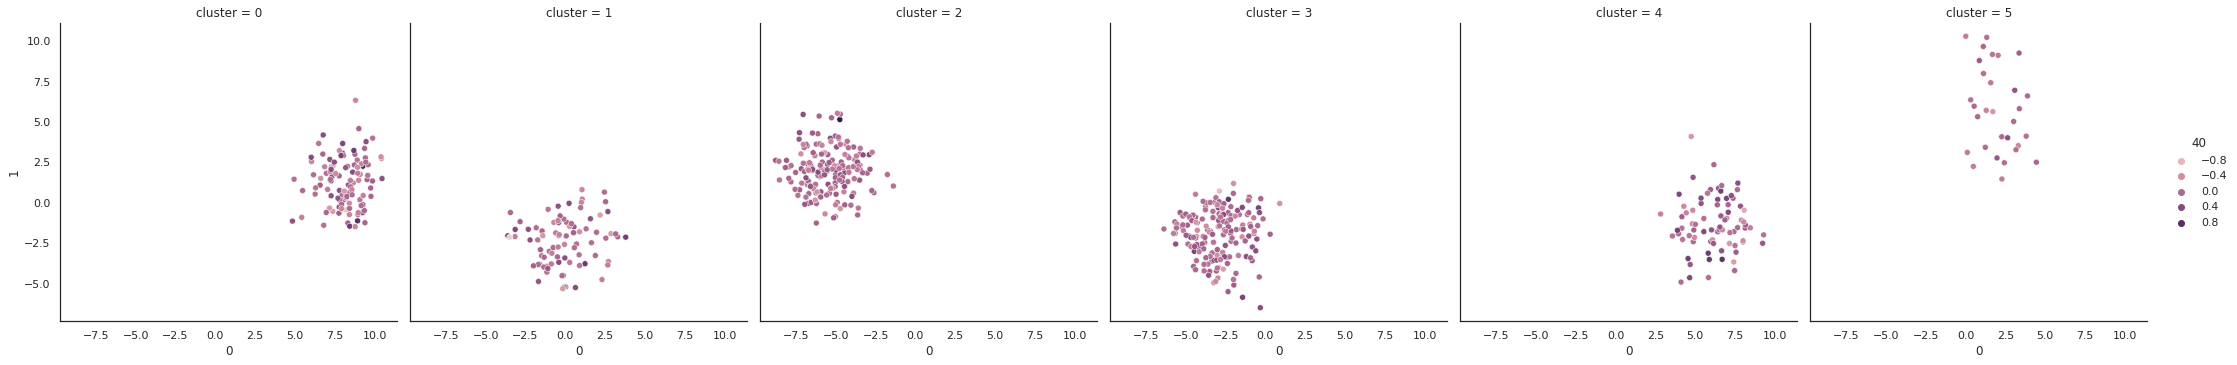

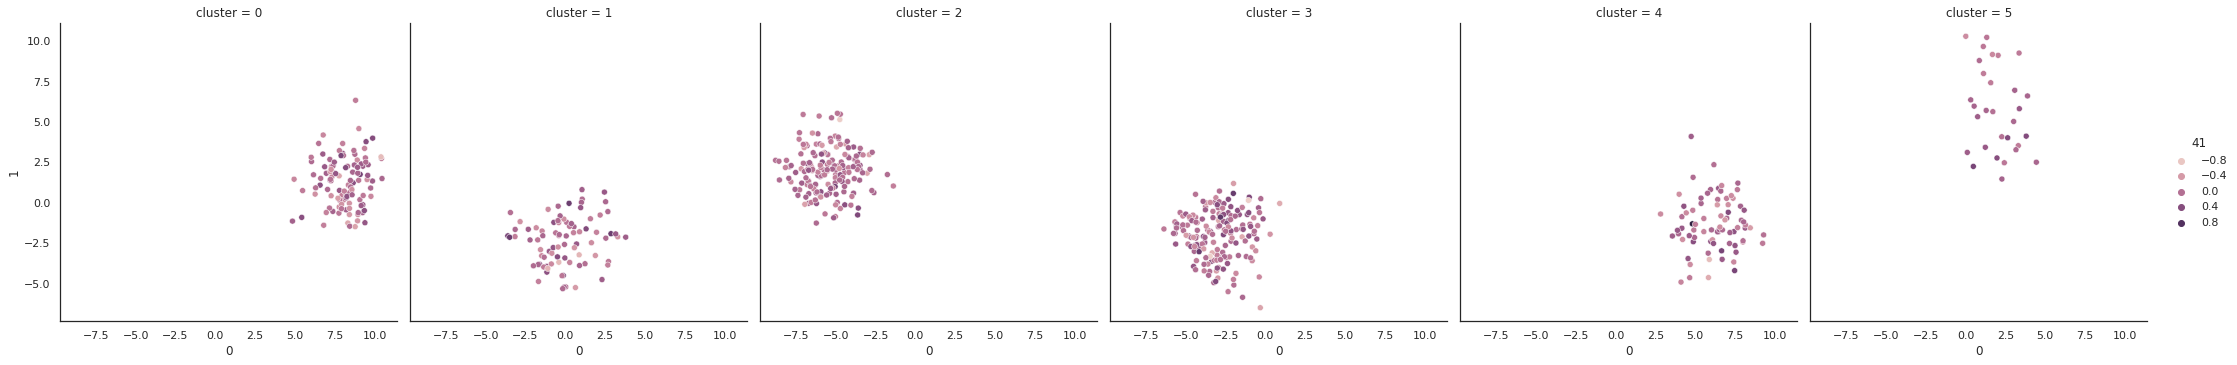

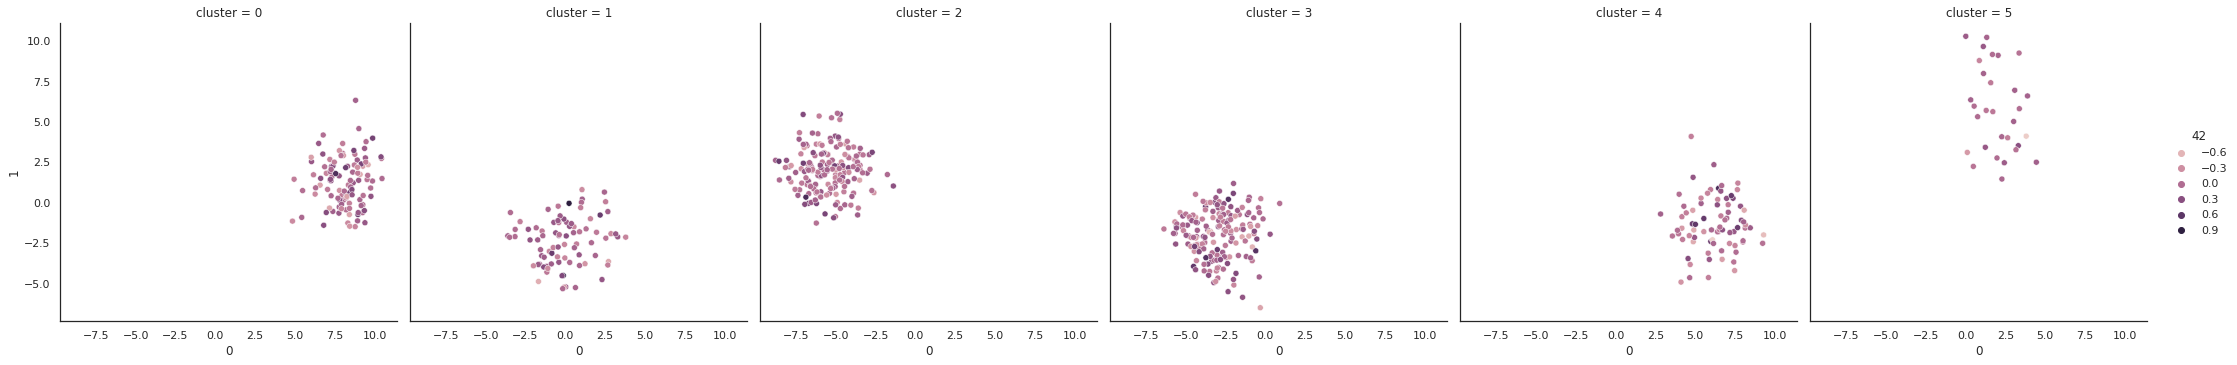

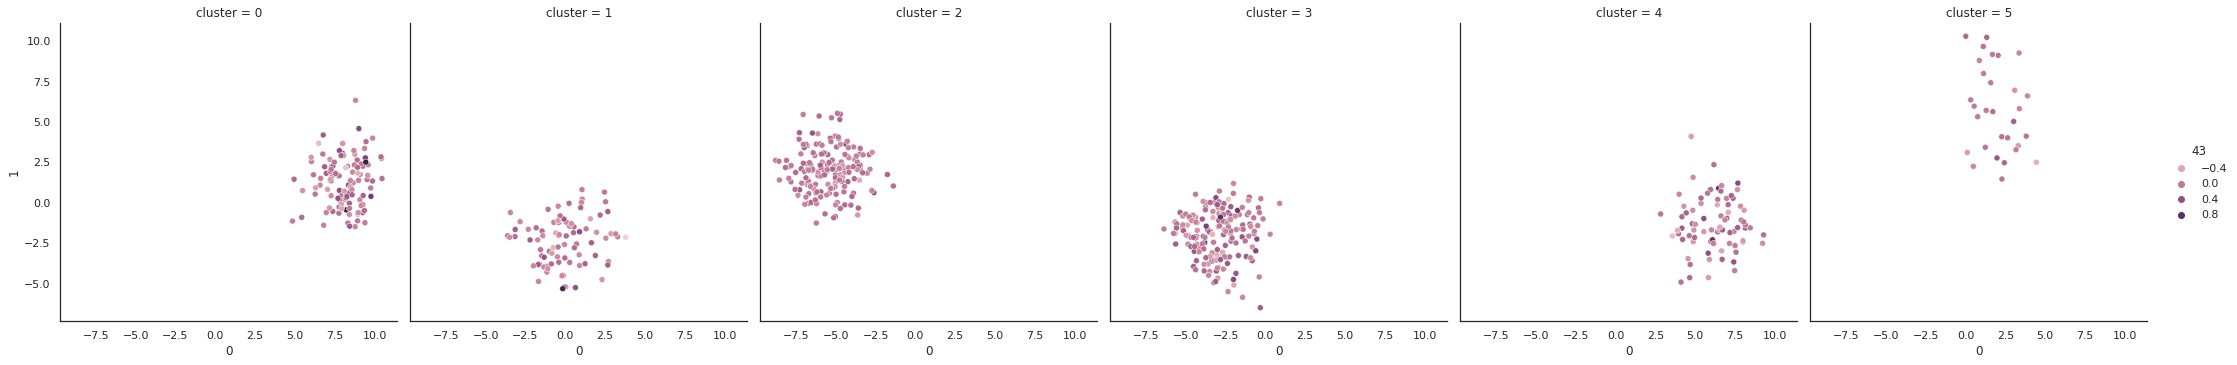

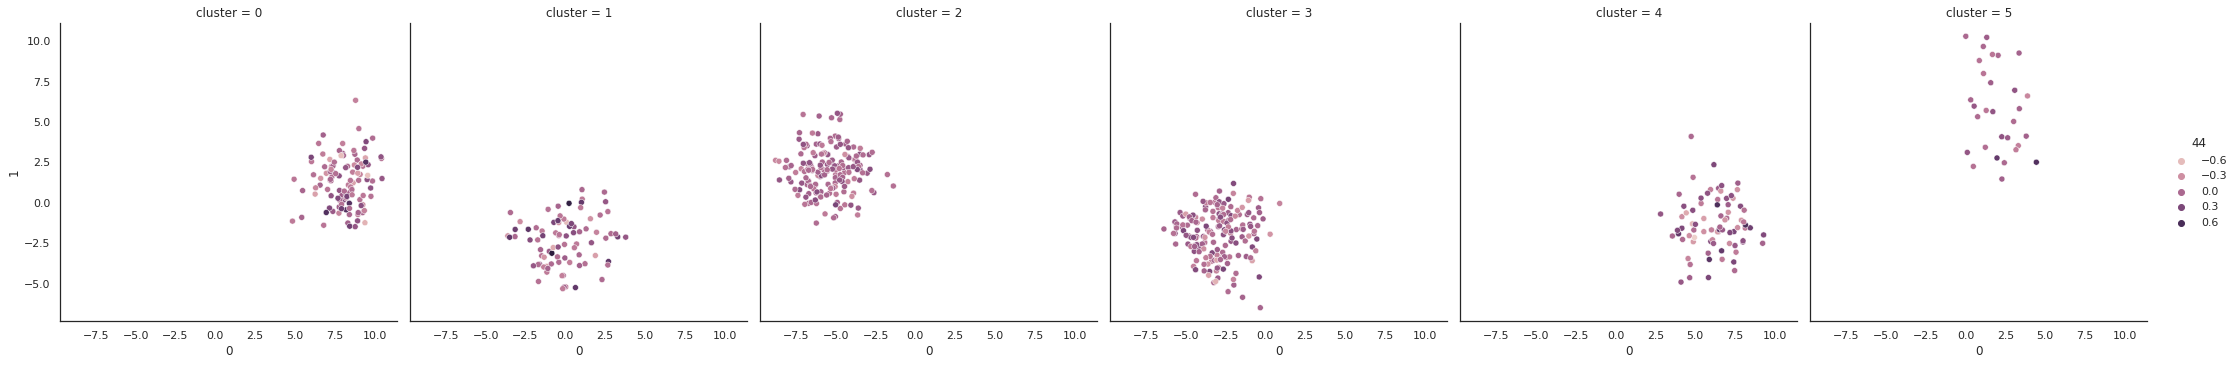

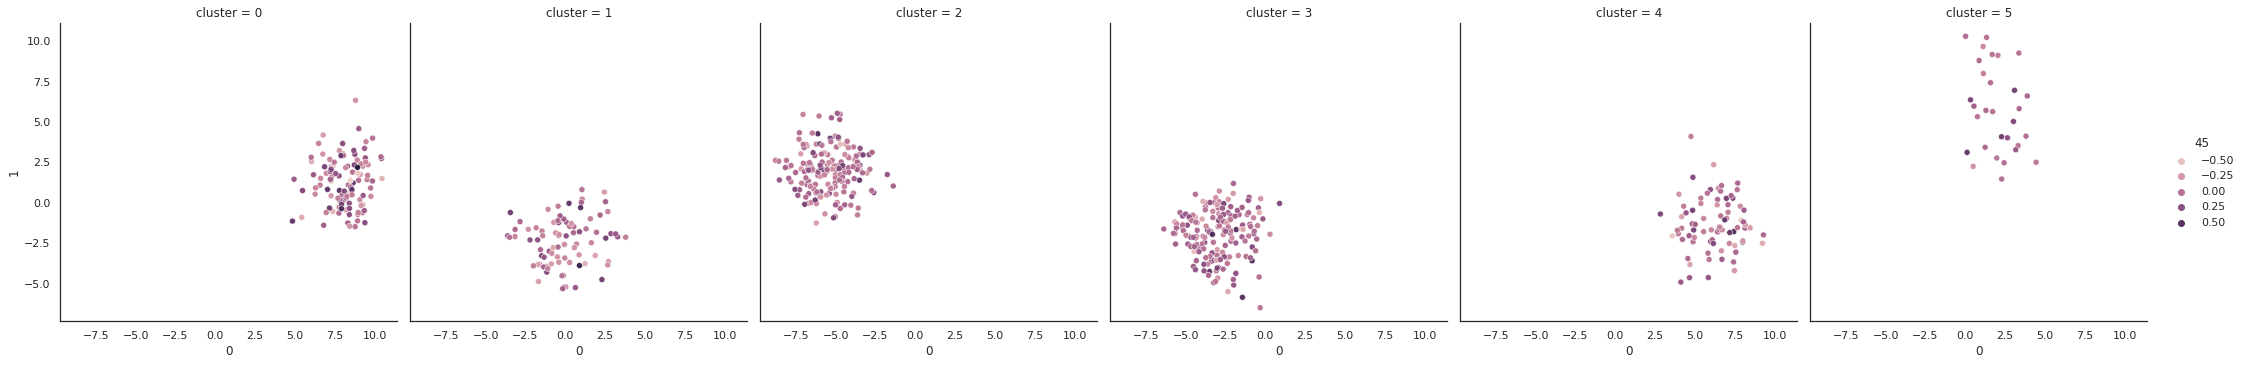

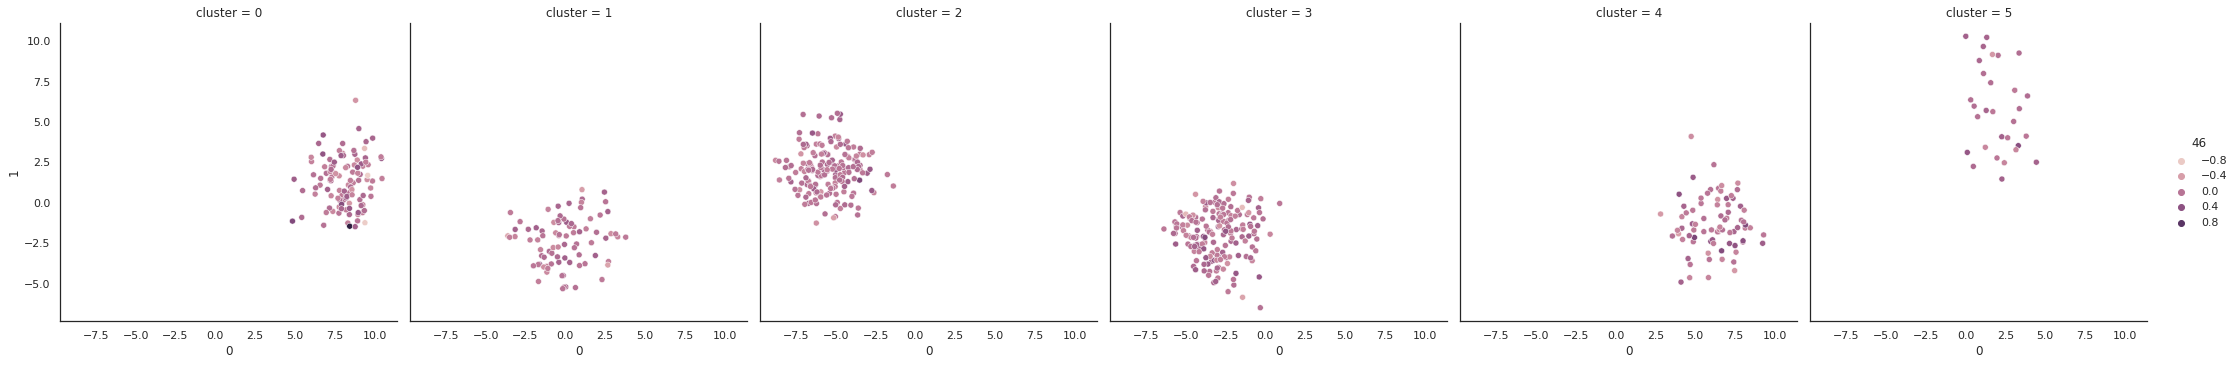

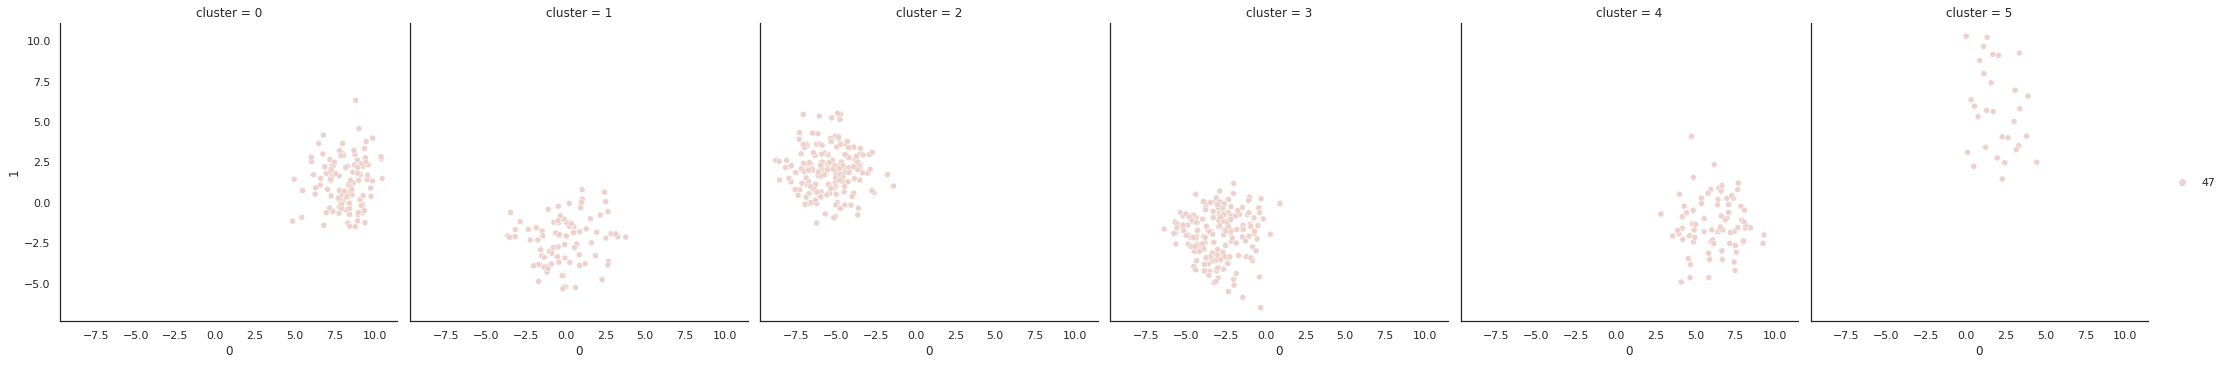

In [110]:
# sns.relplot(data=reduce_bce, x=0, y=1, hue=0, col="cluster")
# sns.despine()

for i in range(0,48):
    sns.relplot(data=reduce_bce, x=0, y=1, hue=i, col="cluster")
    sns.despine()

In [118]:
## Given these data, we can see clustering occurring in the first gene name

<hr>

### Part 2 [20 points]

After doing some reasearch in the online public database where you collected the patient expression data, you were able to extract a list of breast cancer subtype assossiated to each of your patient.

Upload the <code>breast_cancer_subtype</code> data and incorporate it to your expression data. Having this new information, re-do your clustering analysis.

Are you able to link each found cluster to a cancer subtype?

In [113]:
fn2 = "breast_cancer_subtype.tsv"
data_bcs = pd.read_csv(fn2, sep = "\t")
data_bcs

Basal
0     Basal
1     Basal
2     Basal
3     Basal
4     Basal
..      ...
639  Normal
640  Normal
641  Normal
642  Normal
643  Normal

[644 rows x 1 columns]

In [121]:
reduce_bce["Subtype"] = data_bcs

reduce_bce

0         1         2         3         4         5         6  \
0    9.264688  2.231807  0.964991 -2.131075 -0.098354  1.069809  0.605815   
1    7.794874  0.732082 -1.141297  1.332433  1.271122  0.469944  0.632577   
2    8.005062 -2.458199 -2.821219  2.396689  0.219696 -0.285557  0.371973   
3    8.321142 -1.284390 -1.042043 -1.083681  0.406203  2.204460  0.271024   
4    3.576266 -2.089123 -2.808648  6.931476 -0.344832  0.817378 -1.408007   
..        ...       ...       ...       ...       ...       ...       ...   
640  1.133602  7.964754  1.929736 -1.109872  0.686706 -1.740159  0.140004   
641  3.170828  3.248832  1.500530 -2.643236 -0.104649 -0.186207  0.489494   
642  1.586072  7.394928  2.972734 -0.559862  0.858476  0.258948 -0.693968   
643  1.245953  3.402544  4.942678  0.988805 -0.494954  0.737549 -0.327824   
644  1.979551  2.740657  0.143423 -1.896762  0.696785  0.241539 -0.205922   

            7         8         9  ...        39        40        41  \
0   -1.029693  0.544319 -0.256190  ... -0.098423  0.918352  0.187434   
1    0.010944  1.241624  0.794444  ...  0.156716  0.311776  0.244172   
2    0.374003  0.672532 -0.350341  ...  0.043821 -0.194599 -0.241069   
3    0.556414  1.756337  0.963701  ...  0.274866  0.107674 -0.535071   
4    2.899480 -1.895153 -0.263459  ...  0.060081 -0.103643  0.188989   
..        ...       ...       ...  ...       ...       ...       ...   
640  0.273140  1.161577 -1.165051  ...  0.067141 -0.059744 -0.130458   
641 -0.155189  0.220720 -2.072617  ...  0.761996 -0.060017  0.062107   
642  0.115288  0.101900  0.336974  ...  0.150882 -0.169768 -0.117347   
643  0.902547  0.177132 -1.832936  ...  0.500201 -0.023648  0.241192   
644 -0.244748 -0.201634 -1.196274  ...  0.088222  0.204248  0.391763   

           42        43        44        45        46  cluster  Subtype  
0   -0.424231  0.156743 -0.088714 -0.202160 -0.154234        0    Basal  
1   -0.332960  0.425786  0.150019  0.444819 -0.158334        0    Basal  
2   -0.097057 -0.176216  0.200189  0.491736  0.039126        4    Basal  
3   -0.246774 -0.015794  0.056308  0.117882 -0.140260        0    Basal  
4   -0.066659 -0.593408  0.010863 -0.545634  0.032241        4    Basal  
..        ...       ...       ...       ...       ...      ...      ...  
640  0.089120 -0.047592 -0.097969 -0.108243  0.046450        5   Normal  
641 -0.054606 -0.065017 -0.174109  0.156648 -0.196188        5   Normal  
642 -0.126480 -0.024956  0.077154  0.008530  0.059293        5   Normal  
643  0.192034  0.033169 -0.055623  0.028116 -0.193674        5   Normal  
644 -0.000452  0.349662  0.438910 -0.046662 -0.038742        5      NaN  

[645 rows x 49 columns]

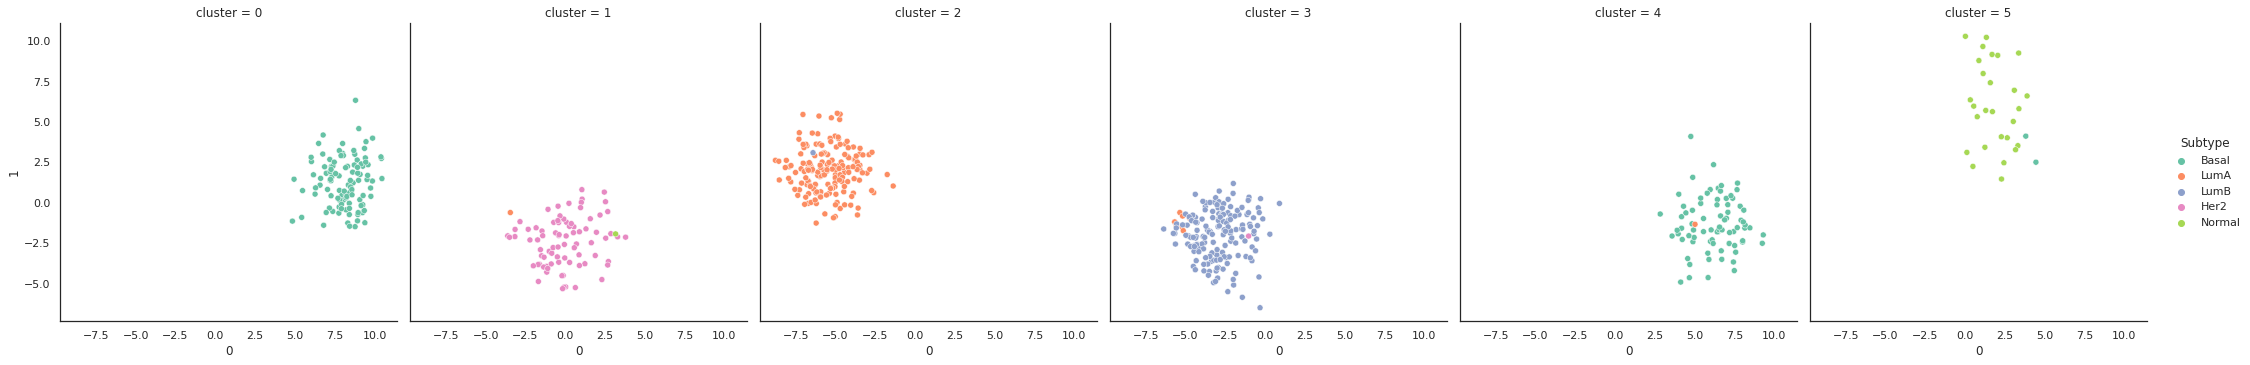

In [122]:
sns.relplot(data=reduce_bce, x=0, y=1, hue="Subtype", col="cluster")
sns.despine()

In [124]:
# Yes, there appears to be a link between the clustering and the cancer subtype. This tells us that the cancer subtype is related to the gene type.

<hr>

### Part 3 [10 points]

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

<hr>

### Part 4 [10 points]

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are the identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work [5 points]

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!